# **Avaliação e Previsão de Agentes e Fenômenos que Mais Causam Impactos Socioeconômicos na Região Sudeste do Brasil**

# Sumário
0. [Instalação das Dependências](#instalar)

# **0.** Instalação das Dependências
<a id="instalar"></a>

In [1]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# **1.** Importação das Bibliotecas
<a id="bibliotecas"></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
import shap
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

C:\Users\guilh\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **2.** Importação das Bases de Dados
<a id="bases"></a>

In [3]:
rend_trabalho = pd.read_csv('../data/raw/Indic_Geo_Rend.csv', comment=None , header=1)
ind_trabalho = pd.read_csv('../data/raw/Indic_Geo.csv', comment=None , header=1)
gini = pd.read_csv('../data/raw/Indice_Gini_Geo.csv', comment=None , header=1)
nivel_instrucao = pd.read_csv('../data/raw/Instr_Geo.csv', comment=None , header=1)
populacao = pd.read_csv('../data/raw/Pop_Geo.csv', comment=None , header=1)
saneamento = pd.read_csv('../data/raw/Sane_Geo_pes.csv', comment=None , header=1)
analfabetos = pd.read_csv('../data/raw/TaxaAnalf_Geo.csv', comment=None , header=1)
mortalidade = pd.read_csv('../data/raw/TaxaMort_Geo.csv', comment=None , header=1)
plano = pd.read_csv('../data/raw/Benef_Plano_Geo.csv', comment=None , header=1)
leitos = pd.read_csv('../data/raw/Leit_IntTot_Geo.csv', comment=None , header=1)
ocupacao = pd.read_csv('../data/raw/CondOcup_Geo.csv', comment=None , header=1)

## Visualização das Bases de Dados

In [4]:
display(rend_trabalho)

,Estado,Ano,Rendimento médio real habitual do trabalho principal(R$/mês),Rendimento médio real habitual de todos os trabalhos(R$/mês),Rendimento-hora médio real habitual do trabalho principal(R$/hora),Rendimento-hora médio real habitual de todos os trabalhos(R$/hora)\t
0,Rondônia,2023,2636,2695,18.0,18.0
1,Acre,2023,2338,2358,15.0,15.0
2,Amazonas,2023,2308,2367,14.4,14.4
3,Roraima,2023,2701,2791,16.7,16.6
4,Pará,2023,2176,2265,13.8,13.8
...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,3110,3211,18.9,18.9
131,Mato Grosso do Sul,2019,2910,3011,18.2,18.2
132,Mato Grosso,2019,2781,2846,17.4,17.2
133,Goiás,2019,2530,2597,15.2,15.2


In [5]:
display(ind_trabalho)

,Estado,Ano,População em idade de trabalhar,População na força de trabalho,População ocupada,População ocupada em trabalhos formais,População desocupada,População na força de trabalho potencial,População subutilizada,Taxa de participação,Nível de ocupação,Taxa de formalização,Taxa de desocupação,Taxa composta de subutilização
0,Rondônia,2023,1496,851,824,486,27,19.00,56.0,56.9,55.1,59.0,3.2,6.5
1,Acre,2023,691,342,316,152,25,36.00,68.0,49.4,45.7,48.0,7.5,18.0
2,Amazonas,2023,3182,1946,1752,703,194,139.00,424.0,61.2,55.1,40.1,9.9,20.3
3,Roraima,2023,449,280,262,120,18,13.38,62.5,58.4,45.7,6.6,12.8,NaN
4,Pará,2023,6862,4194,3869,1449,325,476.00,1123.0,61.1,56.4,37.4,7.7,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,9396,6280,5788,4045,492,219.00,1011.0,66.8,61.6,69.9,7.8,15.6
131,Mato Grosso do Sul,2019,2113,1460,1345,778,116,88.00,276.0,69.1,63.6,57.8,7.9,17.8
132,Mato Grosso,2019,2649,1845,1694,1006,151,85.00,309.0,69.6,63.9,59.4,8.2,16.0
133,Goiás,2019,5643,3817,3409,1933,408,179.00,731.0,67.6,60.4,56.7,10.7,18.3


In [6]:
display(gini)

,Estado,Ano,Índice Gini
0,Rondônia,2023,0.455
1,Acre,2023,0.511
2,Amazonas,2023,0.512
3,Roraima,2023,0.520
4,Pará,2023,0.501
...,...,...,...
131,Rio Grande do Sul,2019,0.482
132,Mato Grosso do Sul,2019,0.483
133,Mato Grosso,2019,0.454
134,Goiás,2019,0.460


In [7]:
display(nivel_instrucao)

,Estado,Ano,Total Pessoas Ocupadas(1 000 pessoas),Sem instrução ou fundamental incompleto,Ensino fundamental completo ou médio incompleto,Ensino médio completo ou superior incompleto,Ensino superior completo
0,Rondônia,2023,824,27.3,15.7,38.9,18.1
1,Acre,2023,316,22.7,14.5,39.8,23.0
2,Amazonas,2023,1752,21.4,11.2,47.5,19.9
3,Roraima,2023,262,17.2,13.7,45.3,23.8
4,Pará,2023,3869,27.5,15.0,40.9,16.7
...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,5788,23.6,17.4,39.6,19.4
131,Mato Grosso do Sul,2019,1345,28.2,16.8,34.9,20.1
132,Mato Grosso,2019,1694,26.7,18.3,37.4,17.5
133,Goiás,2019,3409,25.8,16.0,39.8,18.4


In [8]:
display(nivel_instrucao)

,Estado,Ano,Total Pessoas Ocupadas(1 000 pessoas),Sem instrução ou fundamental incompleto,Ensino fundamental completo ou médio incompleto,Ensino médio completo ou superior incompleto,Ensino superior completo
0,Rondônia,2023,824,27.3,15.7,38.9,18.1
1,Acre,2023,316,22.7,14.5,39.8,23.0
2,Amazonas,2023,1752,21.4,11.2,47.5,19.9
3,Roraima,2023,262,17.2,13.7,45.3,23.8
4,Pará,2023,3869,27.5,15.0,40.9,16.7
...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,5788,23.6,17.4,39.6,19.4
131,Mato Grosso do Sul,2019,1345,28.2,16.8,34.9,20.1
132,Mato Grosso,2019,1694,26.7,18.3,37.4,17.5
133,Goiás,2019,3409,25.8,16.0,39.8,18.4


In [9]:
display(populacao)

,Estado,Ano,População
0,Acre,2019,865
1,Alagoas,2019,3330
2,Amazonas,2019,3983
3,Amapá,2019,838
4,Bahia,2019,14854
...,...,...,...
130,Rio Grande do Sul,2023,11206
131,Santa Catarina,2023,7913
132,Sergipe,2023,2282
133,São Paulo,2023,45846


In [10]:
display(saneamento)

,Estado,Ano,Saneamento Basico Total(1 000 pessoas),Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)
0,Rondônia,2019,1841.0,22.7
1,Acre,2023,914.0,37.8
2,Amazonas,2023,4221.0,43.6
3,Roraima,2023,610.0,54.6
4,Pará,2023,8902.0,18.4
...,...,...,...,...
130,Rio Grande do Sul,2019,11359.0,68.4
131,Mato Grosso do Sul,2019,2709.0,49.9
132,Mato Grosso,2019,3431.0,36.9
133,Goiás,2019,7021.0,59.6


In [11]:
display(analfabetos)

,Estado,Ano,Taxa de Analfabetismo
0,Rondônia,2023,5.1
1,Acre,2023,9.4
2,Amazonas,2023,5.1
3,Roraima,2023,4.2
4,Pará,2023,6.9
...,...,...,...
130,Rio Grande do Sul,2019,2.4
131,Mato Grosso do Sul,2019,4.6
132,Mato Grosso,2019,5.6
133,Goiás,2019,4.6


In [12]:
display(mortalidade)

,Estado,Ano,Taxa Total Mortalidade,0 a 14 anos,15 a 29 anos,30 a 44 anos,45 a 59 anos,60 anos ou mais,60 a 69 anos,70 anos ou mais
0,Rondônia,2023,5.73,1.10,1.48,2.31,5.45,29.98,14.45,53.54
1,Acre,2023,4.78,1.54,1.32,2.10,5.11,30.23,13.93,52.75
2,Amazonas,2023,4.80,1.53,1.60,2.42,5.34,29.47,14.13,52.66
3,Roraima,2023,4.74,2.52,1.57,2.46,5.75,28.21,14.66,49.97
4,Pará,2023,5.08,1.33,1.44,2.26,4.94,28.61,13.43,49.27
...,...,...,...,...,...,...,...,...,...,...
130,Rio Grande do Sul,2019,7.97,0.94,1.13,1.95,5.66,33.60,15.17,56.90
131,Mato Grosso do Sul,2019,6.06,1.08,1.22,2.07,5.81,32.07,14.83,55.31
132,Mato Grosso,2019,5.16,1.26,1.37,2.15,5.47,29.16,14.62,51.07
133,Goiás,2019,5.88,1.16,1.46,2.14,5.33,30.99,14.38,53.79


In [13]:
display(plano)

,Estado,T1 2019,T2 2019,T3 2019,T4 2019,T1 2020,T2 2020,T3 2020,T4 2020,T1 2021,...,T3 2021,T4 2021,T1 2022,T2 2022,T3 2022,T4 2022,T1 2023,T2 2023,T3 2023,T4 2023
0,Rondônia,99941,104567,104202,103809,105345,107436,106437,112245,109397,...,109470,109143,110414,111001,112095,112299,113119,115597,116071,120689
1,Acre,15112,14374,14409,15464,15573,15018,15544,15774,15552,...,16825,16934,17300,17219,17282,17279,17062,17349,18595,19973
2,Amazonas,400005,409042,415795,430642,439485,421017,439357,457801,459628,...,462127,490663,497536,505700,515848,509477,542588,549525,553702,558178
3,Roraima,9213,9476,9812,10665,10803,10289,10805,11289,10825,...,10972,10730,10902,11118,11045,11491,11372,11631,11768,11691
4,Pará,410263,417289,414379,426214,428410,418499,440902,457614,460211,...,505659,506517,499187,514505,508455,509878,510563,518613,525875,538871
5,Amapá,43889,43420,44229,44497,44445,44021,45834,48269,48598,...,49644,49510,48457,48235,50965,52097,51416,50313,47846,48172
6,Tocantins,49181,120511,121949,126251,126445,111537,62062,63728,63182,...,130005,130278,129395,119472,120848,121521,122139,121469,124778,127249
7,Maranhão,197051,194141,195059,201519,206131,199345,214092,223894,224574,...,240966,245027,252267,265950,272590,281604,287596,293209,314189,324883
8,Piauí,84202,84390,85628,91800,96288,89132,93756,105918,108355,...,120771,128841,130013,138822,145142,151008,157527,169434,179582,191980
9,Ceará,951107,964397,944408,966518,992173,958343,979538,996734,1022691,...,1020264,1048814,1051472,1088977,1126009,1157246,1174417,1194993,1222830,1321364


In [14]:
display(leitos)

,Estado,Ano,Número mensal médio de leitos de internação (total)
0,Rondônia,2019,4477
1,Acre,2019,1469
2,Amazonas,2019,5701
3,Roraima,2019,1071
4,Pará,2019,14412
...,...,...,...
130,Rio Grande do Sul,2023,29615
131,Mato Grosso do Sul,2023,5907
132,Mato Grosso,2023,7533
133,Goiás,2023,18728


In [15]:
display(ocupacao)

,Estado,Ano,Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas),Domicílio Próprio - já pago,Domicílio Próprio - pagando,Domicílio Alugado,Domicílio Cedido por empregador,Domicílio Cedido por familiar,Domicílio Cedido de outra forma,Outra Forma
0,Rondônia,2023,1841.0,68.8,1.5,19.9,2.0,6.2,1.5,0.1
1,Acre,2023,914.0,79.8,0.7,10.2,2.0,6.4,0.6,0.3
2,Amazonas,2023,4221.0,73.8,1.9,15.5,0.7,7.2,0.7,0.1
3,Roraima,2023,610.0,59.0,2.8,26.1,2.7,7.7,1.7,0.1
4,Pará,2023,8902.0,74.1,3.0,13.5,1.4,6.8,0.8,0.3
...,...,...,...,...,...,...,...,...,...,...
131,Rio Grande do Sul,2019,11359.0,68.6,8.9,15.2,1.0,5.2,0.8,0.4
132,Mato Grosso do Sul,2019,2709.0,51.9,11.5,21.8,5.9,7.8,0.8,0.2
133,Mato Grosso,2019,3431.0,60.0,6.1,23.0,5.2,4.7,0.9,0.3
134,Goiás,2019,7021.0,54.5,11.1,23.1,3.1,7.2,0.7,0.4


# **3.** Análise dos Dados Antes do Tratamento
<a id="analise1"></a>

## Verificação do Tamanho das Colunas e Linhas das Bases de Dados

In [16]:
rend_trabalho.shape

(135, 6)

In [17]:
ind_trabalho.shape

(135, 14)

In [18]:
gini.shape

(136, 3)

In [19]:
nivel_instrucao.shape

(135, 7)

In [20]:
populacao.shape

(135, 3)

In [21]:
saneamento.shape

(135, 4)

In [22]:
analfabetos.shape

(135, 3)

In [23]:
mortalidade.shape

(135, 10)

In [24]:
plano.shape

(27, 21)

In [25]:
leitos.shape

(135, 3)

In [26]:
ocupacao.shape

(136, 10)

Ao avaliar a dimensão das bases de dados, observa-se que, em média, estas possuem 135 linhas e 7 colunas. Diante disso, as bases incluem informações referentes a todos os estados brasileiros. Para direcionar a análise e torná-la mais consistente, optou-se por filtrá-las, mantendo apenas os registros dos estados da região Sudeste (Espírito Santo, Minas Gerais, Rio de Janeiro e São Paulo). <br><br>
Além disso, verificou-se que a base denominada `plano` apresenta um volume maior de colunas em comparação às demais. Isso ocorre porque ela disponibiliza dados sobre o número de beneficiários por plano de saúde com periodicidade *trimestral*, diferentemente das outras bases, que apresentam dados anuais. Diante disso, será necessário realizar um tratamento prévio para padroniza-la e consolidar os dados no formato adequado a este caso.

---


## Verificação de Valores Nulos nas Bases de Dados

In [27]:
rend_trabalho.isnull().sum()

Estado                                                                  0
Ano                                                                     0
Rendimento médio real habitual do trabalho principal(R$/mês)            0
Rendimento médio real habitual de todos os trabalhos(R$/mês)            0
Rendimento-hora médio real habitual do trabalho principal(R$/hora)      0
Rendimento-hora médio real habitual de todos os trabalhos(R$/hora)\t    0
dtype: int64

In [28]:
ind_trabalho.isnull().sum()

Estado                                       0
Ano                                          0
População em idade de trabalhar              0
População na força de trabalho               0
População ocupada                            0
População ocupada em trabalhos formais       0
População desocupada                         0
População na força de trabalho potencial     0
População subutilizada                       0
Taxa de participação                         0
Nível de ocupação                            0
Taxa de formalização                         0
Taxa de desocupação                          0
Taxa composta de subutilização              29
dtype: int64

In [29]:
(ind_trabalho.isnull().sum() / len(ind_trabalho)) * 100

Estado                                       0.000000
Ano                                          0.000000
População em idade de trabalhar              0.000000
População na força de trabalho               0.000000
População ocupada                            0.000000
População ocupada em trabalhos formais       0.000000
População desocupada                         0.000000
População na força de trabalho potencial     0.000000
População subutilizada                       0.000000
Taxa de participação                         0.000000
Nível de ocupação                            0.000000
Taxa de formalização                         0.000000
Taxa de desocupação                          0.000000
Taxa composta de subutilização              21.481481
dtype: float64

In [30]:
gini.isnull().sum()

Estado         0
Ano            0
Índice Gini    0
dtype: int64

In [31]:
nivel_instrucao.isnull().sum()

Estado                                             0
Ano                                                0
Total Pessoas Ocupadas(1 000 pessoas)              0
Sem instrução ou fundamental incompleto            0
Ensino fundamental completo ou médio incompleto    0
Ensino médio completo ou superior incompleto       0
Ensino superior completo                           0
dtype: int64

In [32]:
populacao.isnull().sum()

Estado       0
Ano          0
População    0
dtype: int64

In [33]:
saneamento.isnull().sum()

Estado                                                                                   0
Ano                                                                                      0
Saneamento Basico Total(1 000 pessoas)                                                  54
Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)    54
dtype: int64

In [34]:
(saneamento.isnull().sum() / len(saneamento)) * 100

Estado                                                                                   0.0
Ano                                                                                      0.0
Saneamento Basico Total(1 000 pessoas)                                                  40.0
Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)    40.0
dtype: float64

In [35]:
analfabetos.isnull().sum()

Estado                    0
Ano                       0
Taxa de Analfabetismo    54
dtype: int64

In [36]:
(analfabetos.isnull().sum() / len(analfabetos)) * 100

Estado                    0.0
Ano                       0.0
Taxa de Analfabetismo    40.0
dtype: float64

In [37]:
mortalidade.isnull().sum()

Estado                    0
Ano                       0
Taxa Total Mortalidade    0
0 a 14 anos               0
15 a 29 anos              0
30 a 44 anos              0
45 a 59 anos              0
60 anos ou mais           0
60 a 69 anos              0
70 anos ou mais           0
dtype: int64

In [38]:
plano.isnull().sum()

Estado     0
T1 2019    0
T2 2019    0
T3 2019    0
T4 2019    0
T1 2020    0
T2 2020    0
T3 2020    0
T4 2020    0
T1 2021    0
T2 2021    0
T3 2021    0
T4 2021    0
T1 2022    0
T2 2022    0
T3 2022    0
T4 2022    0
T1 2023    0
T2 2023    0
T3 2023    0
T4 2023    0
dtype: int64

In [39]:
leitos.isnull().sum()

Estado                                                 0
Ano                                                    0
Número mensal médio de leitos de internação (total)    0
dtype: int64

In [40]:
ocupacao.isnull().sum()

Estado                                                                0
Ano                                                                   0
Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)    54
Domicílio Próprio - já pago                                          54
Domicílio Próprio - pagando                                          54
Domicílio Alugado                                                    54
Domicílio Cedido por empregador                                      54
Domicílio Cedido por familiar                                        54
Domicílio Cedido de outra forma                                      54
Outra Forma                                                          57
dtype: int64

In [41]:
(ocupacao.isnull().sum() / len(ocupacao)) * 100

Estado                                                                0.000000
Ano                                                                   0.000000
Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)    39.705882
Domicílio Próprio - já pago                                          39.705882
Domicílio Próprio - pagando                                          39.705882
Domicílio Alugado                                                    39.705882
Domicílio Cedido por empregador                                      39.705882
Domicílio Cedido por familiar                                        39.705882
Domicílio Cedido de outra forma                                      39.705882
Outra Forma                                                          41.911765
dtype: float64

A análise sobre valores nulos nas bases de dados, revelou significativa ocorrência de ausência em diversas variáveis. A base `ind_trabalho` apresenta aproximadamente 21% de valores ausentes em uma variável específica. As bases `saneamento` e `analfabetos` exibem um patamar ainda mais elevado, com cerca de 40% de ausência em duas variáveis cada. Na base `ocupação`, identificou-se um volume expressivo de aproximadamente 40% de dados faltantes distribuídos em oito variáveis. 

Essas lacunas podem comprometer a qualidade analítica, reduzindo a confiabilidade dos resultados e dificultando interpretações precisas. Portanto, será aplicado técnicas de tratamento de dados para garantir maior consistência às análises subsequentes.

---



## Visualização dos Tipos de Dados em Cada Base

In [42]:
rend_trabalho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Estado                                                               135 non-null    object 
 1   Ano                                                                  135 non-null    int64  
 2   Rendimento médio real habitual do trabalho principal(R$/mês)         135 non-null    int64  
 3   Rendimento médio real habitual de todos os trabalhos(R$/mês)         135 non-null    int64  
 4   Rendimento-hora médio real habitual do trabalho principal(R$/hora)   135 non-null    float64
 5   Rendimento-hora médio real habitual de todos os trabalhos(R$/hora)	  135 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 6.5+ KB


In [43]:
ind_trabalho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado                                    135 non-null    object 
 1   Ano                                       135 non-null    int64  
 2   População em idade de trabalhar           135 non-null    int64  
 3   População na força de trabalho            135 non-null    int64  
 4   População ocupada                         135 non-null    int64  
 5   População ocupada em trabalhos formais    135 non-null    int64  
 6   População desocupada                      135 non-null    int64  
 7   População na força de trabalho potencial  135 non-null    float64
 8   População subutilizada                    135 non-null    float64
 9   Taxa de participação                      135 non-null    float64
 10  Nível de ocupação                     

In [44]:
gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Estado       136 non-null    object 
 1   Ano          136 non-null    int64  
 2   Índice Gini  136 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


In [45]:
nivel_instrucao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Estado                                           135 non-null    object 
 1   Ano                                              135 non-null    int64  
 2   Total Pessoas Ocupadas(1 000 pessoas)            135 non-null    int64  
 3   Sem instrução ou fundamental incompleto          135 non-null    float64
 4   Ensino fundamental completo ou médio incompleto  135 non-null    float64
 5   Ensino médio completo ou superior incompleto     135 non-null    float64
 6   Ensino superior completo                         135 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 7.5+ KB


In [46]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Estado     135 non-null    object
 1   Ano        135 non-null    int64 
 2   População  135 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [47]:
saneamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Estado                                                                                135 non-null    object 
 1   Ano                                                                                   135 non-null    int64  
 2   Saneamento Basico Total(1 000 pessoas)                                                81 non-null     float64
 3   Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)  81 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.3+ KB


In [48]:
analfabetos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Estado                 135 non-null    object 
 1   Ano                    135 non-null    int64  
 2   Taxa de Analfabetismo  81 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


In [49]:
mortalidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Estado                  135 non-null    object 
 1   Ano                     135 non-null    object 
 2   Taxa Total Mortalidade  135 non-null    float64
 3   0 a 14 anos             135 non-null    float64
 4   15 a 29 anos            135 non-null    float64
 5   30 a 44 anos            135 non-null    float64
 6   45 a 59 anos            135 non-null    float64
 7   60 anos ou mais         135 non-null    float64
 8   60 a 69 anos            135 non-null    float64
 9   70 anos ou mais         135 non-null    float64
dtypes: float64(8), object(2)
memory usage: 10.7+ KB


In [50]:
plano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Estado   27 non-null     object
 1   T1 2019  27 non-null     int64 
 2   T2 2019  27 non-null     int64 
 3   T3 2019  27 non-null     int64 
 4   T4 2019  27 non-null     int64 
 5   T1 2020  27 non-null     int64 
 6   T2 2020  27 non-null     int64 
 7   T3 2020  27 non-null     int64 
 8   T4 2020  27 non-null     int64 
 9   T1 2021  27 non-null     int64 
 10  T2 2021  27 non-null     int64 
 11  T3 2021  27 non-null     int64 
 12  T4 2021  27 non-null     int64 
 13  T1 2022  27 non-null     int64 
 14  T2 2022  27 non-null     int64 
 15  T3 2022  27 non-null     int64 
 16  T4 2022  27 non-null     int64 
 17  T1 2023  27 non-null     int64 
 18  T2 2023  27 non-null     int64 
 19  T3 2023  27 non-null     int64 
 20  T4 2023  27 non-null     int64 
dtypes: int64(20), object(1)
memory usage: 4.6

In [51]:
leitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Estado                                               135 non-null    object
 1   Ano                                                  135 non-null    int64 
 2   Número mensal médio de leitos de internação (total)  135 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [52]:
ocupacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 10 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Estado                                                             136 non-null    object 
 1   Ano                                                                136 non-null    int64  
 2   Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)  82 non-null     float64
 3   Domicílio Próprio - já pago                                        82 non-null     float64
 4   Domicílio Próprio - pagando                                        82 non-null     float64
 5   Domicílio Alugado                                                  82 non-null     float64
 6   Domicílio Cedido por empregador                                    82 non-null     float64
 7   Domicílio Cedido por famil

A partir da análise dos tipos de dados presentes em cada base, identificou-se que as variáveis *'estado'* e *'ano'* são comuns entre os conjuntos de dados. A variável *'estado'* é categórica, sendo representada como do tipo object, enquanto *'ano'* é uma variável temporal armazenada como inteiro de 64 bits (int64), correspondente a um valor de quatro dígitos. As demais variáveis apresentam natureza numérica, sendo tipadas como int64 ou float64, conforme a necessidade de representação de valores inteiros ou decimais associada a cada indicador.

---

# **4.** Tratamento dos Dados
<a id="tratamento"></a>

## Filtração dos Dados para Apenas a Região Sudeste do Brasil

In [53]:
rend_trabalho = rend_trabalho[(rend_trabalho['Estado'] == 'Minas Gerais') | (rend_trabalho['Estado'] == 'Espírito Santo') | (rend_trabalho['Estado'] == 'Rio de Janeiro') | (rend_trabalho['Estado'] == 'São Paulo')]
ind_trabalho = ind_trabalho[(ind_trabalho['Estado'] == 'Minas Gerais') | (ind_trabalho['Estado'] == 'Espírito Santo') | (ind_trabalho['Estado'] == 'Rio de Janeiro') | (ind_trabalho['Estado'] == 'São Paulo')]
gini = gini[(gini['Estado'] == 'Minas Gerais') | (gini['Estado'] == 'Espírito Santo') | (gini['Estado'] == 'Rio de Janeiro') | (gini['Estado'] == 'São Paulo')]
nivel_instrucao = nivel_instrucao[(nivel_instrucao['Estado'] == 'Minas Gerais') | (nivel_instrucao['Estado'] == 'Espírito Santo') | (nivel_instrucao['Estado'] == 'Rio de Janeiro') | (nivel_instrucao['Estado'] == 'São Paulo')]
populacao = populacao[(populacao['Estado'] == 'Minas Gerais') | (populacao['Estado'] == 'Espírito Santo') | (populacao['Estado'] == 'Rio de Janeiro') | (populacao['Estado'] == 'São Paulo')]
saneamento = saneamento[(saneamento['Estado'] == 'Minas Gerais') | (saneamento['Estado'] == 'Espírito Santo') | (saneamento['Estado'] == 'Rio de Janeiro') | (saneamento['Estado'] == 'São Paulo')]
analfabetos = analfabetos[(analfabetos['Estado'] == 'Minas Gerais') | (analfabetos['Estado'] == 'Espírito Santo') | (analfabetos['Estado'] == 'Rio de Janeiro') | (analfabetos['Estado'] == 'São Paulo')]
mortalidade = mortalidade[(mortalidade['Estado'] == 'Minas Gerais') | (mortalidade['Estado'] == 'Espírito Santo') | (mortalidade['Estado'] == 'Rio de Janeiro') | (mortalidade['Estado'] == 'São Paulo')]
leitos = leitos[(leitos['Estado'] == 'Minas Gerais') | (leitos['Estado'] == 'Espírito Santo') | (leitos['Estado'] == 'Rio de Janeiro') | (leitos['Estado'] == 'São Paulo')]
plano = plano[(plano['Estado'] == 'Minas Gerais') | (plano['Estado'] == 'Espírito Santo') | (plano['Estado'] == 'Rio de Janeiro') | (plano['Estado'] == 'São Paulo')]
ocupacao = ocupacao[(ocupacao['Estado'] == 'Minas Gerais') | (ocupacao['Estado'] == 'Espírito Santo') | (ocupacao['Estado'] == 'Rio de Janeiro') | (ocupacao['Estado'] == 'São Paulo')]

## Substituição dos Valores Nulos das Colunas que os possuem, por suas Respectivas Médias, de seus Respectivos Estados

### Variável *'Taxa composta de subutilização'* da Base `ind_trabalho`

In [54]:
media_mg = ind_trabalho.loc[ind_trabalho['Estado'] == 'Minas Gerais','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'Minas Gerais', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'Minas Gerais', 'Taxa composta de subutilização'].fillna(media_mg)

media_es = ind_trabalho.loc[ind_trabalho['Estado'] == 'Espírito Santo','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'Espírito Santo', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'Espírito Santo', 'Taxa composta de subutilização'].fillna(media_es)

media_rj = ind_trabalho.loc[ind_trabalho['Estado'] == 'Rio de Janeiro','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'Rio de Janeiro', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'Rio de Janeiro', 'Taxa composta de subutilização'].fillna(media_rj)

media_sp = ind_trabalho.loc[ind_trabalho['Estado'] == 'São Paulo','Taxa composta de subutilização'].mean()
ind_trabalho.loc[ind_trabalho['Estado'] == 'São Paulo', 'Taxa composta de subutilização'] = ind_trabalho.loc[
ind_trabalho['Estado'] == 'São Paulo', 'Taxa composta de subutilização'].fillna(media_sp)

In [55]:
ind_trabalho.isnull().sum()

Estado                                      0
Ano                                         0
População em idade de trabalhar             0
População na força de trabalho              0
População ocupada                           0
População ocupada em trabalhos formais      0
População desocupada                        0
População na força de trabalho potencial    0
População subutilizada                      0
Taxa de participação                        0
Nível de ocupação                           0
Taxa de formalização                        0
Taxa de desocupação                         0
Taxa composta de subutilização              0
dtype: int64

### Variável *'Saneamento Basico Total(1 000 pessoas)'* da Base `saneamento`

In [56]:
media_mg = saneamento.loc[saneamento['Estado'] == 'Minas Gerais','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'Minas Gerais', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'Minas Gerais', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_mg)

media_es = saneamento.loc[saneamento['Estado'] == 'Espírito Santo','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'Espírito Santo', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'Espírito Santo', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_es)

media_rj = saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'Rio de Janeiro', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_rj)

media_sp = saneamento.loc[saneamento['Estado'] == 'São Paulo','Saneamento Basico Total(1 000 pessoas)'].mean()
saneamento.loc[saneamento['Estado'] == 'São Paulo', 'Saneamento Basico Total(1 000 pessoas)'] = saneamento.loc[
saneamento['Estado'] == 'São Paulo', 'Saneamento Basico Total(1 000 pessoas)'].fillna(media_sp)

### Variável *'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'* da Base `saneamento`

In [57]:
media_mg = saneamento.loc[saneamento['Estado'] == 'Minas Gerais','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'Minas Gerais', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'Minas Gerais', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_mg)

media_es = saneamento.loc[saneamento['Estado'] == 'Espírito Santo','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'Espírito Santo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'Espírito Santo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_es)

media_rj = saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'Rio de Janeiro', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'Rio de Janeiro', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_rj)

media_sp = saneamento.loc[saneamento['Estado'] == 'São Paulo','Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].mean()
saneamento.loc[saneamento['Estado'] == 'São Paulo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'] = saneamento.loc[
saneamento['Estado'] == 'São Paulo', 'Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].fillna(media_sp)

In [58]:
saneamento.isnull().sum()

Estado                                                                                  0
Ano                                                                                     0
Saneamento Basico Total(1 000 pessoas)                                                  0
Proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)    0
dtype: int64

### Variável *'Taxa de Analfabetismo'* da Base `analfabetos`



In [59]:
media_mg = analfabetos.loc[analfabetos['Estado'] == 'Minas Gerais','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'Minas Gerais', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'Minas Gerais', 'Taxa de Analfabetismo'].fillna(media_mg)

media_es = analfabetos.loc[analfabetos['Estado'] == 'Espírito Santo','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'Espírito Santo', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'Espírito Santo', 'Taxa de Analfabetismo'].fillna(media_es)

media_rj = analfabetos.loc[analfabetos['Estado'] == 'Rio de Janeiro','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'Rio de Janeiro', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'Rio de Janeiro', 'Taxa de Analfabetismo'].fillna(media_rj)

media_sp = analfabetos.loc[analfabetos['Estado'] == 'São Paulo','Taxa de Analfabetismo'].mean()
analfabetos.loc[analfabetos['Estado'] == 'São Paulo', 'Taxa de Analfabetismo'] = analfabetos.loc[
analfabetos['Estado'] == 'São Paulo', 'Taxa de Analfabetismo'].fillna(media_sp)

In [60]:
analfabetos.isnull().sum()

Estado                   0
Ano                      0
Taxa de Analfabetismo    0
dtype: int64

### Variável *'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'* da Base `ocupacao`

In [61]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)'].fillna(media_sp)

### Variável *'Domicílio Próprio - já pago'* da Base `ocupacao`

In [62]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - já pago'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - já pago'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - já pago'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Próprio - já pago'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - já pago'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - já pago'].fillna(media_sp)

### Variável *'Domicílio Próprio - pagando'* da Base `ocupacao`

In [63]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Próprio - pagando'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Próprio - pagando'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Próprio - pagando'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Próprio - pagando'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - pagando'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Próprio - pagando'].fillna(media_sp)

### Variável *'Domicílio Alugado'* da Base `ocupacao`

In [64]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Alugado'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Alugado'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Alugado'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Alugado'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Alugado'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Alugado'].fillna(media_sp)

### Variável *'Domicílio Cedido por empregador'* da Base `ocupacao`

In [65]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por empregador'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por empregador'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por empregador'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Cedido por empregador'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por empregador'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por empregador'].fillna(media_sp)

### Variável *'Domicílio Cedido por familiar'* da Base `ocupacao`

In [66]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido por familiar'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido por familiar'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido por familiar'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Cedido por familiar'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por familiar'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido por familiar'].fillna(media_sp)

### Variável *'Domicílio Cedido de outra forma'* da Base `ocupacao`

In [67]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Domicílio Cedido de outra forma'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Domicílio Cedido de outra forma'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Domicílio Cedido de outra forma'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Domicílio Cedido de outra forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido de outra forma'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Domicílio Cedido de outra forma'].fillna(media_sp)

### Variável *'Outra Forma'* da Base `ocupacao`

In [68]:
media_mg = ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Minas Gerais', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Minas Gerais', 'Outra Forma'].fillna(media_mg)

media_es = ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Espírito Santo', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Espírito Santo', 'Outra Forma'].fillna(media_es)

media_rj = ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'Rio de Janeiro', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'Rio de Janeiro', 'Outra Forma'].fillna(media_rj)

media_sp = ocupacao.loc[ocupacao['Estado'] == 'São Paulo','Outra Forma'].mean()
ocupacao.loc[ocupacao['Estado'] == 'São Paulo', 'Outra Forma'] = ocupacao.loc[
ocupacao['Estado'] == 'São Paulo', 'Outra Forma'].fillna(media_sp)

In [69]:
ocupacao.isnull().sum()

Estado                                                               0
Ano                                                                  0
Total Pessoas por Condição de Ocupação a domicílio(1 000 pessoas)    0
Domicílio Próprio - já pago                                          0
Domicílio Próprio - pagando                                          0
Domicílio Alugado                                                    0
Domicílio Cedido por empregador                                      0
Domicílio Cedido por familiar                                        0
Domicílio Cedido de outra forma                                      0
Outra Forma                                                          0
dtype: int64

## Padronização da Base `plano` para Dados Anuais, Utilizando a Média Anual de cada Estado

In [70]:
plano_reformado = plano.melt(id_vars=["Estado"], var_name="Trimestre", value_name="Número de beneficiários de plano de saúde")
plano_reformado["Ano"] = plano_reformado["Trimestre"].str.split().str[1].astype(int)
plano_anual = plano_reformado.groupby(["Estado", "Ano"], as_index=False)["Número de beneficiários de plano de saúde"].mean()
plano = plano_anual.copy()
display(plano)

,Estado,Ano,Número de beneficiários de plano de saúde
0,Espírito Santo,2019,508849.75
1,Espírito Santo,2020,527951.25
2,Espírito Santo,2021,591777.00
3,Espírito Santo,2022,639377.75
4,Espírito Santo,2023,686278.50
5,Minas Gerais,2019,2070470.25
6,Minas Gerais,2020,2125927.75
7,Minas Gerais,2021,2329022.50
8,Minas Gerais,2022,2548886.25
9,Minas Gerais,2023,2701387.25


## Unificação das Bases de Dados

In [71]:
bases =[rend_trabalho, ind_trabalho, gini, nivel_instrucao, populacao, saneamento, analfabetos, mortalidade, leitos, plano, ocupacao]
from functools import reduce

for df in bases:
    df.columns = df.columns.str.lower().str.strip()

for df in bases:
    df.loc[:, 'ano'] = pd.to_numeric(df['ano'], errors='coerce').astype('Int64')

database = reduce(lambda left, right: pd.merge(
    left, right, on=['estado', 'ano'], how='outer'), bases)
display(database)

,estado,ano,rendimento médio real habitual do trabalho principal(r$/mês),rendimento médio real habitual de todos os trabalhos(r$/mês),rendimento-hora médio real habitual do trabalho principal(r$/hora),rendimento-hora médio real habitual de todos os trabalhos(r$/hora),população em idade de trabalhar,população na força de trabalho,população ocupada,população ocupada em trabalhos formais,...,número mensal médio de leitos de internação (total),número de beneficiários de plano de saúde,total pessoas por condição de ocupação a domicílio(1 000 pessoas),domicílio próprio - já pago,domicílio próprio - pagando,domicílio alugado,domicílio cedido por empregador,domicílio cedido por familiar,domicílio cedido de outra forma,outra forma
0,Espírito Santo,2019,2758,2880,17.1,17.1,3212,2188,1963,1115,...,8001,508849.75,4015.000000,64.200000,4.800000,19.700000,3.200000,7.400000,0.600000,0.100000
1,Espírito Santo,2020,2751,2834,16.7,16.7,3264,2087,1818,1085,...,8054,527951.25,4117.666667,63.400000,4.800000,20.933333,2.833333,7.233333,0.666667,0.166667
2,Espírito Santo,2021,2487,2555,15.3,15.3,3263,2116,1849,1095,...,8161,591777.00,4117.666667,63.400000,4.800000,20.933333,2.833333,7.233333,0.666667,0.166667
3,Espírito Santo,2022,2675,2773,16.3,16.3,3362,2170,1985,1207,...,8286,639377.75,4148.000000,63.600000,4.900000,21.100000,2.400000,6.800000,0.900000,0.300000
4,Espírito Santo,2023,2889,3004,18.4,18.4,3377,2158,2036,1222,...,8411,686278.50,4190.000000,62.400000,4.700000,22.000000,2.900000,7.500000,0.500000,0.100000
5,Minas Gerais,2019,2386,2511,15.0,15.0,17266,11448,10270,6196,...,40915,2070470.25,21158.000000,64.600000,7.800000,17.600000,1.800000,7.400000,0.700000,0.100000
6,Minas Gerais,2020,2408,2528,14.8,14.9,17489,10829,9456,5945,...,42385,2125927.75,21432.333333,63.000000,7.133333,19.766667,2.033333,7.300000,0.633333,0.133333
7,Minas Gerais,2021,2378,2463,14.3,14.4,17448,10970,9640,5968,...,42771,2329022.50,21432.333333,63.000000,7.133333,19.766667,2.033333,7.300000,0.633333,0.133333
8,Minas Gerais,2022,2355,2433,14.5,14.5,17558,11235,10370,6354,...,42838,2548886.25,21515.000000,63.600000,6.400000,20.100000,2.200000,6.900000,0.600000,0.200000
9,Minas Gerais,2023,2680,2810,16.1,16.2,17705,11483,10818,6692,...,42564,2701387.25,21624.000000,60.800000,7.200000,21.600000,2.100000,7.600000,0.600000,0.100000


### Importação da Base Unificada

In [72]:
#database.to_csv("../data/processed/database.csv", index=False)
#database.to_excel("../data/processed/database.xlsx", index=False)

# **5.** Análise Exploratória dos Dados
<a id="analise2"></a>

## Verificação das Informações da Base

### Quantidade de Linhas e Colunas

In [73]:
database.shape

(20, 46)

### Quantidade de Valores Nulos por Coluna

In [74]:
database.isnull().sum()

estado                                                                                  0
ano                                                                                     0
rendimento médio real habitual do trabalho principal(r$/mês)                            0
rendimento médio real habitual de todos os trabalhos(r$/mês)                            0
rendimento-hora médio real habitual do trabalho principal(r$/hora)                      0
rendimento-hora médio real habitual de todos os trabalhos(r$/hora)                      0
população em idade de trabalhar                                                         0
população na força de trabalho                                                          0
população ocupada                                                                       0
população ocupada em trabalhos formais                                                  0
população desocupada                                                                    0
população 

### Informações dos Tipos dos Dados

In [75]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 46 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   estado                                                                                20 non-null     object 
 1   ano                                                                                   20 non-null     object 
 2   rendimento médio real habitual do trabalho principal(r$/mês)                          20 non-null     int64  
 3   rendimento médio real habitual de todos os trabalhos(r$/mês)                          20 non-null     int64  
 4   rendimento-hora médio real habitual do trabalho principal(r$/hora)                    20 non-null     float64
 5   rendimento-hora médio real habitual de todos os trabalhos(r$/hora)                    2

## Verificando Infomações Estatísticas da Base

In [76]:
database.describe()

,rendimento médio real habitual do trabalho principal(r$/mês),rendimento médio real habitual de todos os trabalhos(r$/mês),rendimento-hora médio real habitual do trabalho principal(r$/hora),rendimento-hora médio real habitual de todos os trabalhos(r$/hora),população em idade de trabalhar,população na força de trabalho,população ocupada,população ocupada em trabalhos formais,população desocupada,população na força de trabalho potencial,...,número mensal médio de leitos de internação (total),número de beneficiários de plano de saúde,total pessoas por condição de ocupação a domicílio(1 000 pessoas),domicílio próprio - já pago,domicílio próprio - pagando,domicílio alugado,domicílio cedido por empregador,domicílio cedido por familiar,domicílio cedido de outra forma,outra forma
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,...,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,3024.850000,3126.000000,18.530000,18.570000,18447.200000,11926.200000,10549.850000,6945.650000,1376.400000,664.65000,...,45023.250000,4.029782e+06,22445.416667,62.400000,6.391667,21.483333,1.800000,7.07500,0.608333,0.250000
std,489.145041,490.750553,2.931157,2.939943,12996.581342,8785.051799,7825.427059,5498.621715,1072.011655,499.22079,...,31722.888448,3.602118e+06,15829.477118,4.634753,2.405473,2.371480,0.732935,0.43594,0.130619,0.117229
min,2355.000000,2433.000000,14.300000,14.400000,3212.000000,2087.000000,1818.000000,1085.000000,122.000000,81.00000,...,8001.000000,5.088498e+05,4015.000000,54.700000,2.800000,17.600000,0.900000,6.00000,0.400000,0.100000
25%,2628.000000,2718.500000,15.900000,15.975000,11686.250000,6773.500000,5632.250000,3686.500000,565.750000,228.75000,...,28487.000000,1.724422e+06,13995.500000,59.700000,4.675000,20.016667,1.175000,6.77500,0.500000,0.133333
50%,3073.500000,3172.500000,19.150000,19.150000,16039.500000,9946.000000,8802.500000,5543.500000,1255.500000,600.00000,...,38932.000000,2.973953e+06,19401.000000,63.400000,5.650000,20.933333,1.600000,7.30000,0.600000,0.300000
75%,3502.000000,3595.500000,21.400000,21.425000,22644.000000,14701.000000,13349.500000,8691.250000,1663.500000,1035.75000,...,54977.000000,4.853717e+06,27696.250000,64.725000,8.125000,22.575000,2.250000,7.35000,0.666667,0.325000
max,3743.000000,3862.000000,21.900000,22.000000,39274.000000,26434.000000,24463.000000,16622.000000,3617.000000,1702.00000,...,94600.000000,1.097158e+07,47327.000000,70.700000,10.500000,26.100000,3.200000,7.60000,0.900000,0.400000


A descrição estatística dos dados fornece um resumo conciso das principais características de cada coluna:

*   **count:** Indica a quantidade de valores não nulos em cada coluna. Ou seja, mostra quantos registros de fato contêm dados válidos.

*   **mean:** Representa a média aritmética dos dados de cada coluna, ou seja, a soma de todos os valores dividida pela quantidade de valores.

*   **std** (Desvio Padrão): Mede o grau de dispersão dos valores em relação à média. Um desvio padrão alto indica que os dados estão muito espalhados. Já um std baixo indica que os dados estão concentrados próximos da média.

*   **min**: Apresenta o menor valor encontrado na coluna.

*  **25%** (Primeiro Quartil - Q1): Indica que 25% dos dados estão abaixo desse valor. Representa o limite inferior da faixa de valores típicos.

*   **50%** (Mediana ou Segundo Quartil - Q2): O valor central da distribuição, indica que 50% dos dados estão abaixo dele.

*   **75%** (Terceiro Quartil - Q3): Indica que 75% dos dados estão abaixo desse valor. Representa o limite superior da faixa de valores "típicos".

*   **max:** Apresenta o maior valor encontrado na coluna.

---



De modo geral, a inspeção inicial dos dados revela que todas as colunas possuem valores válidos, sem ocorrência de dados nulos. Quanto à dispersão, o desvio padrão (STD) demonstra uma variabilidade significativa entre as variáveis, com algumas colunas apresentando alto grau de dispersão em relação à média e outras com baixa dispersão, o que em determinados casos pode ser favorável ou não a análise.


---


## Gerando Matrizes de Correlação dos Dados

### Matriz Completa da Base

In [77]:
base_numerica = database.select_dtypes(include=['number'])
base_numerica.corr()

,rendimento médio real habitual do trabalho principal(r$/mês),rendimento médio real habitual de todos os trabalhos(r$/mês),rendimento-hora médio real habitual do trabalho principal(r$/hora),rendimento-hora médio real habitual de todos os trabalhos(r$/hora),população em idade de trabalhar,população na força de trabalho,população ocupada,população ocupada em trabalhos formais,população desocupada,população na força de trabalho potencial,...,número mensal médio de leitos de internação (total),número de beneficiários de plano de saúde,total pessoas por condição de ocupação a domicílio(1 000 pessoas),domicílio próprio - já pago,domicílio próprio - pagando,domicílio alugado,domicílio cedido por empregador,domicílio cedido por familiar,domicílio cedido de outra forma,outra forma
rendimento médio real habitual do trabalho principal(r$/mês),1.000000,0.999221,0.988500,0.990495,0.576048,0.562397,0.541803,0.566421,0.653648,0.330764,...,0.582459,0.699721,0.570136,-0.277237,0.194743,0.602806,-0.737421,-0.303871,-0.317512,0.842390
rendimento médio real habitual de todos os trabalhos(r$/mês),0.999221,1.000000,0.986727,0.989049,0.583790,0.570805,0.549902,0.574373,0.663427,0.343013,...,0.590168,0.703099,0.578205,-0.288353,0.210215,0.604171,-0.733891,-0.284203,-0.313073,0.835105
rendimento-hora médio real habitual do trabalho principal(r$/hora),0.988500,0.986727,1.000000,0.999797,0.494701,0.478766,0.457927,0.481362,0.580572,0.242309,...,0.500050,0.627732,0.486932,-0.171355,0.088319,0.523097,-0.732265,-0.378183,-0.401634,0.798522
rendimento-hora médio real habitual de todos os trabalhos(r$/hora),0.990495,0.989049,0.999797,1.000000,0.506420,0.490437,0.469433,0.492847,0.592225,0.257771,...,0.511854,0.637086,0.498867,-0.184594,0.102964,0.532681,-0.734799,-0.368018,-0.399063,0.801735
população em idade de trabalhar,0.576048,0.583790,0.494701,0.506420,1.000000,0.997927,0.994640,0.994202,0.917298,0.881093,...,0.999714,0.966700,0.999798,-0.755420,0.848876,0.735745,-0.677551,0.230288,0.122880,0.720772
população na força de trabalho,0.562397,0.570805,0.478766,0.490437,0.997927,1.000000,0.998339,0.998265,0.907289,0.867601,...,0.997359,0.966734,0.998063,-0.779885,0.867638,0.748011,-0.646750,0.264895,0.144308,0.712640
população ocupada,0.541803,0.549902,0.457927,0.469433,0.994640,0.998339,1.000000,0.998625,0.881553,0.851871,...,0.993308,0.964530,0.994578,-0.789323,0.873391,0.752733,-0.630951,0.283349,0.154218,0.697398
população ocupada em trabalhos formais,0.566421,0.574373,0.481362,0.492847,0.994202,0.998265,0.998625,1.000000,0.890976,0.849393,...,0.993498,0.973611,0.994318,-0.801937,0.871272,0.776345,-0.625435,0.283832,0.163157,0.718732
população desocupada,0.653648,0.663427,0.580572,0.592225,0.917298,0.907289,0.881553,0.890976,1.000000,0.891446,...,0.922368,0.881458,0.918870,-0.629222,0.734691,0.635102,-0.694237,0.102346,0.056844,0.749171
população na força de trabalho potencial,0.330764,0.343013,0.242309,0.257771,0.881093,0.867601,0.851871,0.849393,0.891446,1.000000,...,0.882787,0.773331,0.886332,-0.692221,0.847390,0.553084,-0.513006,0.327868,0.194647,0.484393


### Visualização da Matriz de Correlação por HeatMap

<Axes: >

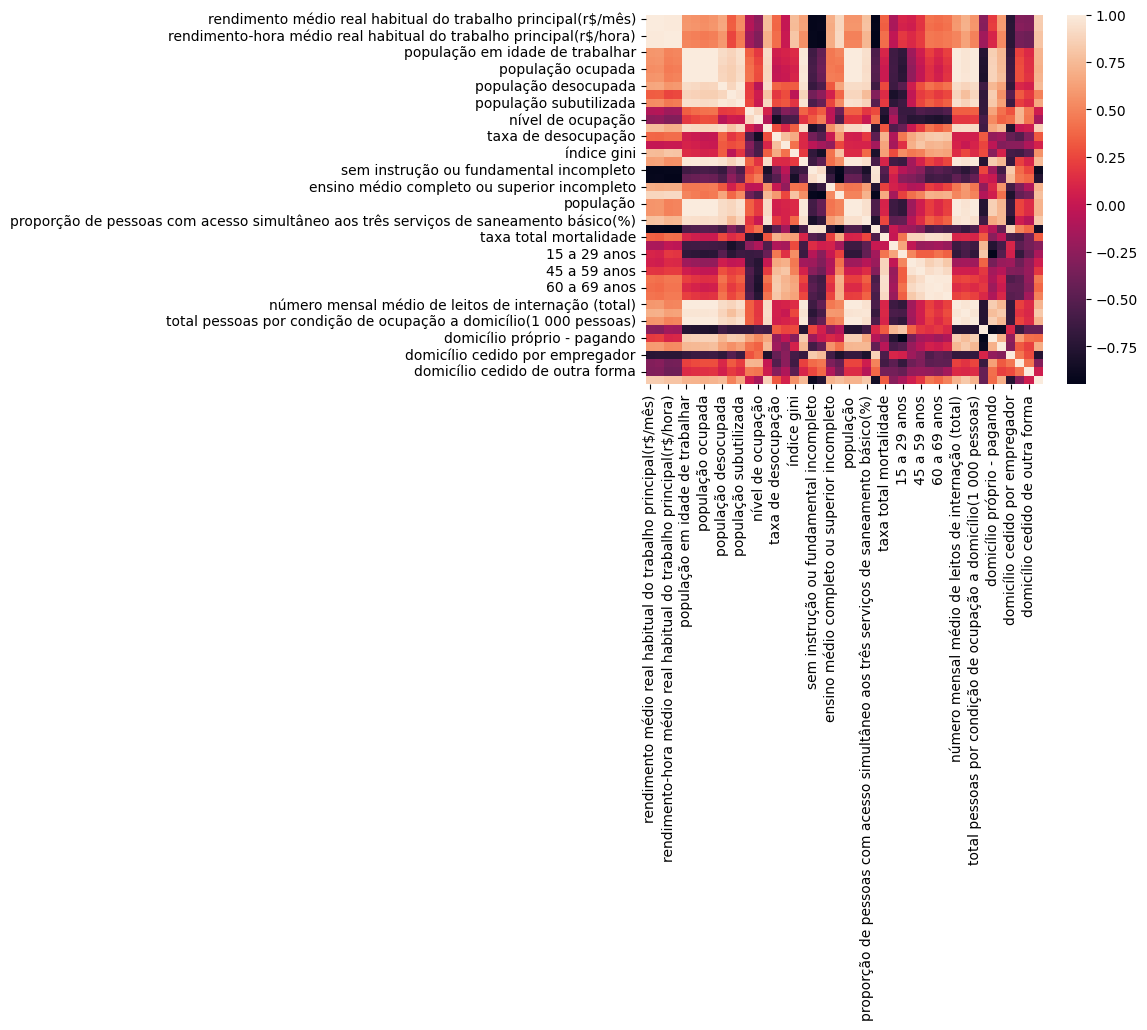

In [78]:
base_numerica = database.select_dtypes(include=['number'])
sns.heatmap(base_numerica.corr())

## Análise da Correlação de Variáveis Específicas da Base

### Variáveis *'rendimento médio real habitual do trabalho principal(r$/mês)'* e *'taxa de analfabetismo'*

In [79]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['taxa de analfabetismo'])
print(correlation_value) 

-0.9412230738890566


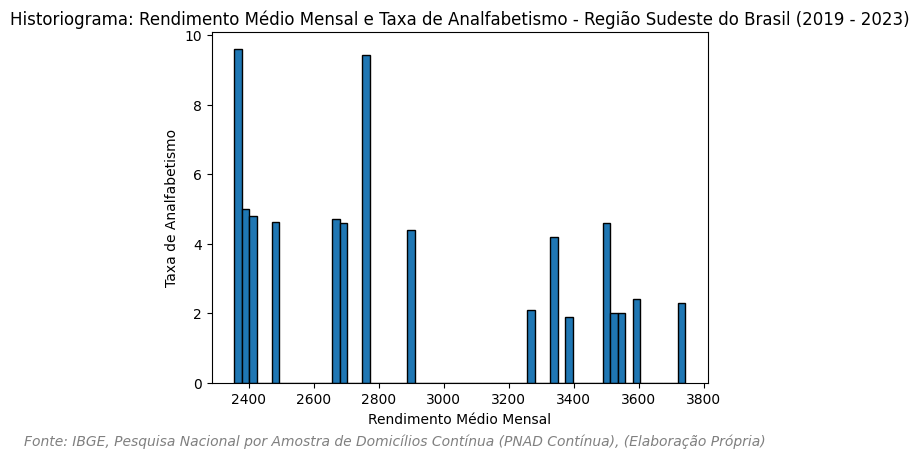

In [80]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['taxa de analfabetismo'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Mensal e Taxa de Analfabetismo - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Mensal")
plt.ylabel("Taxa de Analfabetismo")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

O coeficiente de correlação de Pearson (r = 0,35) indica a existência de uma associação **linear positiva de fraca a moderada** entre as variáveis *Rendimento Médio Mensal* e *Taxa de Mortalidade*. A análise gráfica por meio do histograma evidencia que o aumento singular do Rendimento Médio Mensal está pouco associado ao aumento da taxa de mortalidade, reforçando a tendência identificada pela medida estatística. Adicionalmente, o heatmap da matriz de correlação destaca essa relação por meio de uma coloração mais amena no cruzamento das duas variáveis, corroborando visualmente a força e a direção da correlação observada.


**REVISAAAAAARRRRR**

---

### Variáveis *'rendimento médio real habitual do trabalho principal(r$/mês)'* e *'índice gini'*

In [81]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['índice gini'])
print(correlation_value)

0.7573896437239288


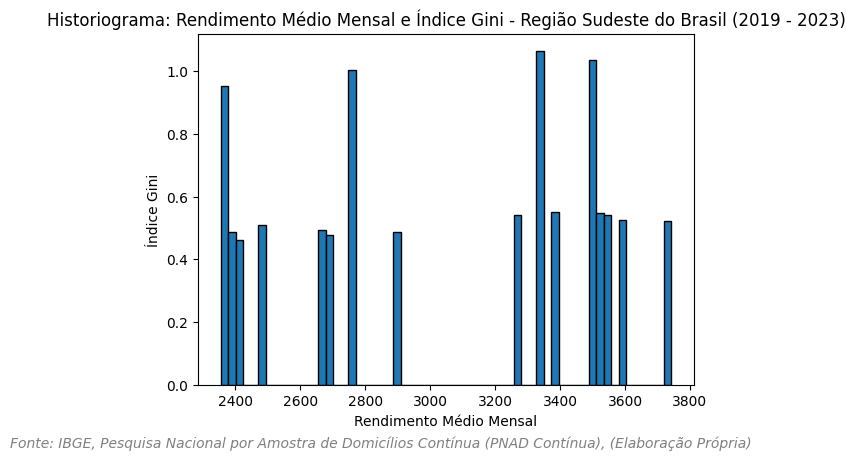

In [82]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['índice gini'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Mensal e Índice Gini - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Mensal")
plt.ylabel("Índice Gini")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

O coeficiente de correlação de Pearson (r = 0,75) indica a existência de uma associação **linear positiva forte** entre as variáveis *Rendimento Médio Mensal* e *Índice Gini*. A análise gráfica por meio do histograma evidencia que o aumento do Rendimento Médio Mensal está fortemente relacionado ao aumento do Índice Gini, reforçando a tendência identificada pela medida estatística. Adicionalmente, o heatmap da matriz de correlação destaca essa relação por meio de uma coloração mais intensa no cruzamento das duas variáveis, corroborando visualmente a força e a direção da correlação observada.


---

### Variáveis *'rendimento médio real habitual do trabalho principal(r$/mês)'* e *'ensino médio completo ou superior incompleto'*

In [83]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['ensino médio completo ou superior incompleto'])
print(correlation_value)

0.6934562452135724


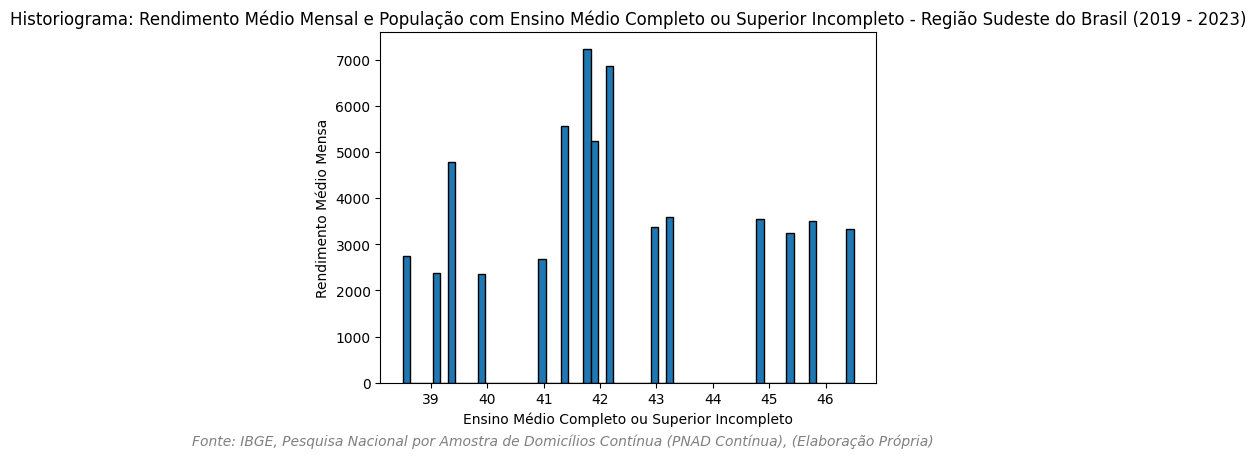

In [84]:
plt.hist(
    database['ensino médio completo ou superior incompleto'],
    weights=database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Mensal e População com Ensino Médio Completo ou Superior Incompleto - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Ensino Médio Completo ou Superior Incompleto")
plt.ylabel("Rendimento Médio Mensa")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

### Variáveis *'ensino médio completo ou superior incompleto'* e *'população ocupada em trabalhos formais'*

In [85]:
correlation_value = database['população ocupada em trabalhos formais'].corr(database['ensino médio completo ou superior incompleto'])
print(correlation_value)

0.46879382620871257


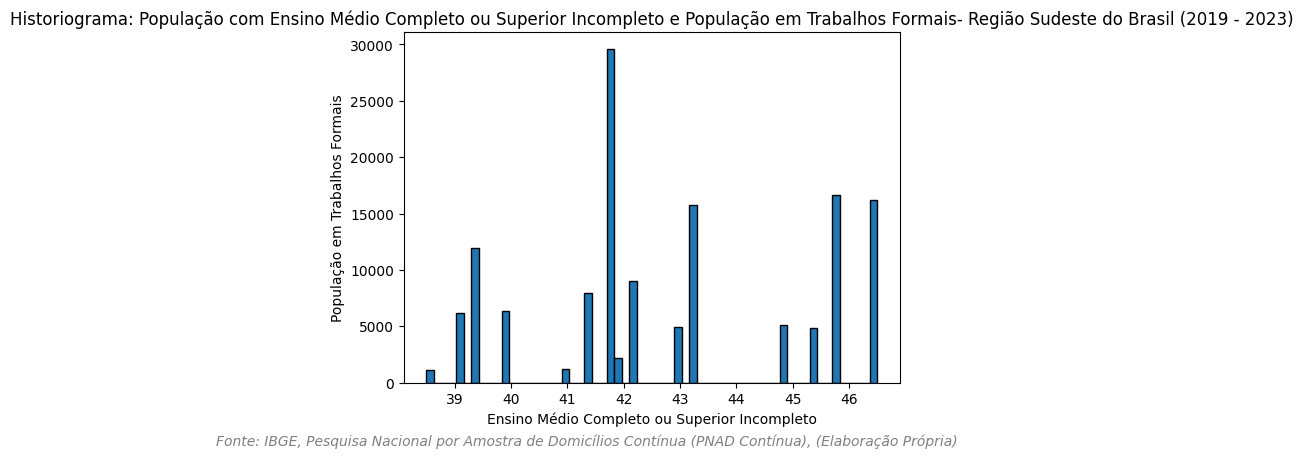

In [86]:
plt.hist(
    database['ensino médio completo ou superior incompleto'],
    weights=database['população ocupada em trabalhos formais'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: População com Ensino Médio Completo ou Superior Incompleto e População em Trabalhos Formais- Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Ensino Médio Completo ou Superior Incompleto")
plt.ylabel("População em Trabalhos Formais")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

O coeficiente de correlação de Pearson (r = 0,69) indica a existência de uma associação **linear positiva e forte** entre as variáveis *Rendimento Médio Mensal* e *Ensino Médio Completo ou Superior Incompleto*. A análise gráfica por meio do histograma evidencia que o aumento da proporção da população com esse nível de escolaridade está associado a incrementos no Produto Interno Bruto, reforçando a tendência identificada pela medida estatística. Adicionalmente, o heatmap da matriz de correlação destaca essa relação por meio de uma coloração mais intensa no cruzamento das duas variáveis, corroborando visualmente a força e a direção positiva da correlação observada.

**REVISAAAAAAAR**

---

### Variáveis *'rendimento médio real habitual do trabalho principal(r$/mês)'* e *'taxa de analfabetismo'*

In [87]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['taxa de analfabetismo'])
print(correlation_value)

-0.9412230738890566


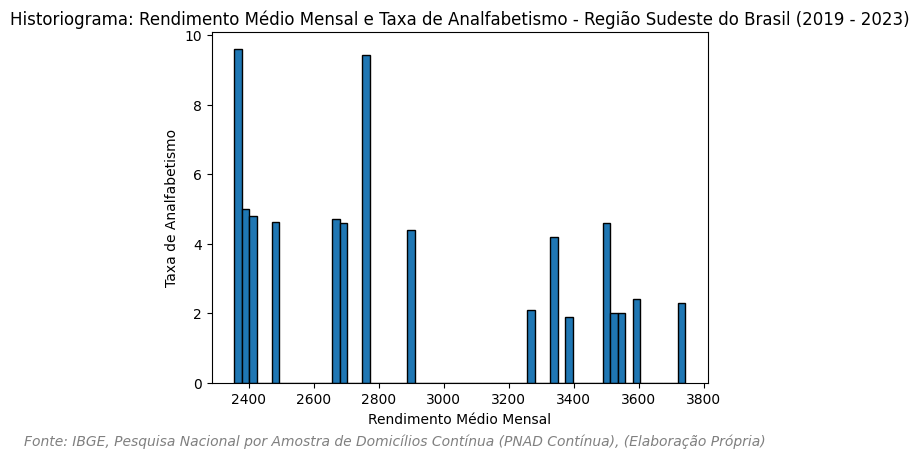

In [88]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['taxa de analfabetismo'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Mensal e Taxa de Analfabetismo - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Mensal")
plt.ylabel("Taxa de Analfabetismo")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

O coeficiente de correlação de Pearson (r = -0,94) evidencia uma associação **linear negativa muito forte** entre as variáveis *Rendimento Médio Mensal* e *Taxa de Analfabetismo*. A análise gráfica indica uma relação inversa entre essas variáveis, na qual o aumento do Rendimento Médio Mensal está fortemente associado ao também aumento da taxa de analfabetismo. Adicionalmente, o heatmap da matriz de correlação reforça esse resultado ao destacar uma coloração significativa no cruzamento das duas variáveis, auxiliando visualmente a direção e a intensidade da correlação identificada pelo coeficiente de Pearson.

---

### Variáveis *'rendimento médio real habitual do trabalho principal(r$/mês)'* e *'proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'*

In [89]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'])
print(correlation_value)

0.784883866755588


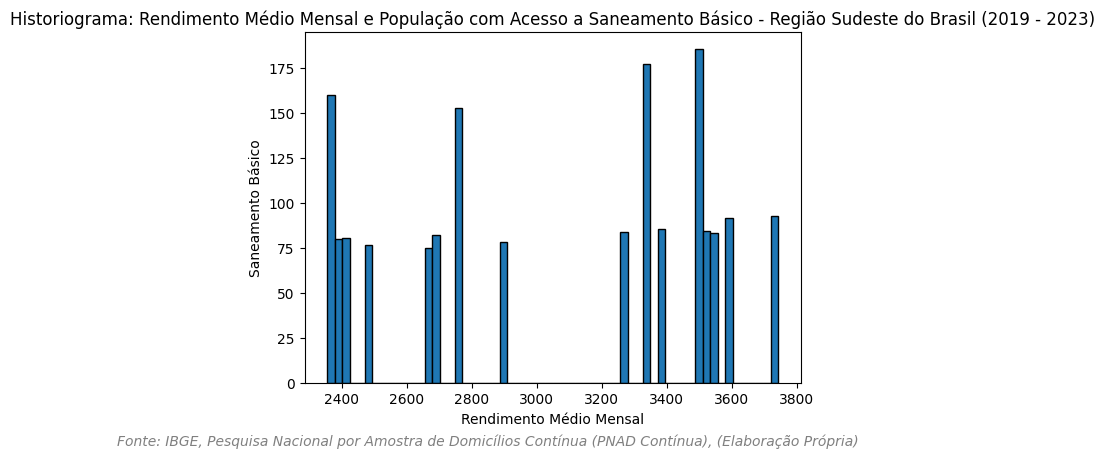

In [90]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Mensal e População com Acesso a Saneamento Básico - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Mensal")
plt.ylabel("Saneamento Básico")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

### Variáveis *'proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'* e *'15 a 29 anos'*

In [91]:
correlation_value = database['proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'].corr(database['15 a 29 anos'])
print(correlation_value)

-0.4535493827169528


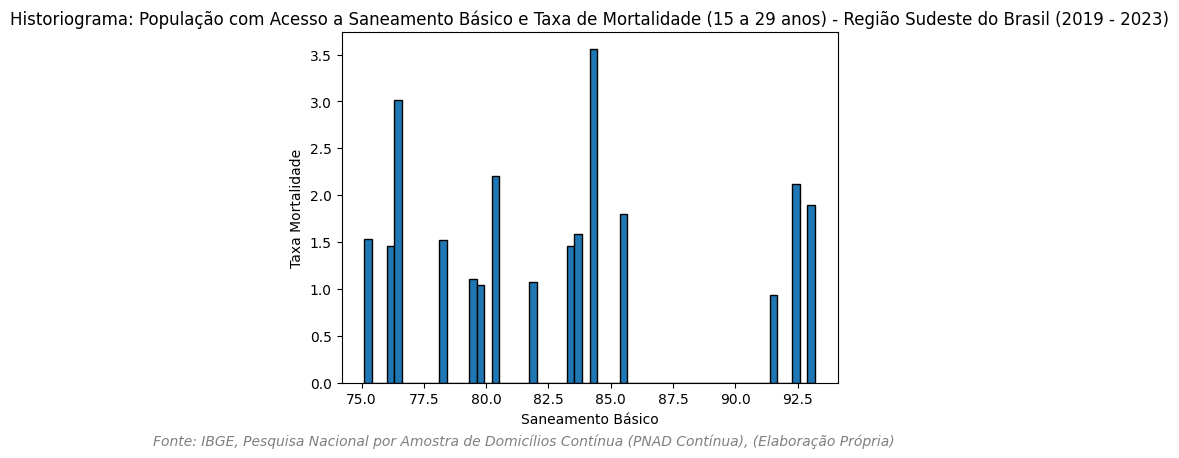

In [92]:
plt.hist(
    database['proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)'],
    weights=database['15 a 29 anos'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: População com Acesso a Saneamento Básico e Taxa de Mortalidade (15 a 29 anos) - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Saneamento Básico")
plt.ylabel("Taxa Mortalidade")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

O coeficiente de correlação de Pearson (r = 0,57) evidencia uma associação **linear positivo moderado** entre as variáveis *Rendimento Médio Mensal* e *Saneamento Básico*. A análise gráfica indica uma relação semelhante entre essas variáveis, na qual o aumento do Rendimento Médio Mensal está fortemente associado ao também aumento da população com acesso ao saneamento básico. Adicionalmente, o heatmap da matriz de correlação reforça esse resultado ao destacar uma coloração significativa no cruzamento das duas variáveis, auxiliando visualmente a direção e a intensidade da correlação identificada pelo coeficiente de Pearson.


**REVISAAAAARRR**

---

### Variáveis *'rendimento médio real habitual do trabalho principal(r$/mês)'* e *'número de beneficiários de plano de saúde'*

In [93]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['número de beneficiários de plano de saúde'])
print(correlation_value)

0.699720520502685


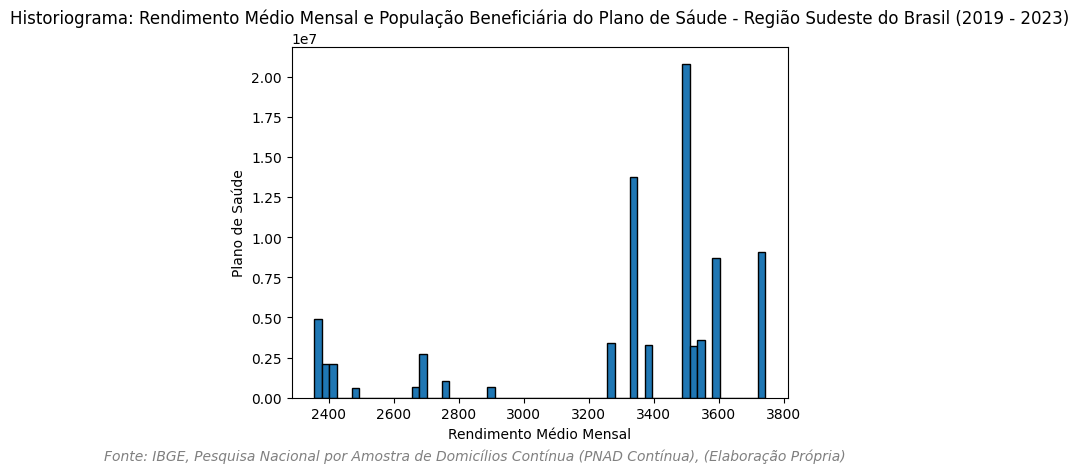

In [94]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['número de beneficiários de plano de saúde'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Mensal e População Beneficiária do Plano de Sáude - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Mensal")
plt.ylabel("Plano de Saúde")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

### Variáveis *'número de beneficiários de plano de saúde'* e *'15 a 29 anos'*

In [95]:
correlation_value = database['15 a 29 anos'].corr(database['número de beneficiários de plano de saúde'])
print(correlation_value)

-0.5764574384282947


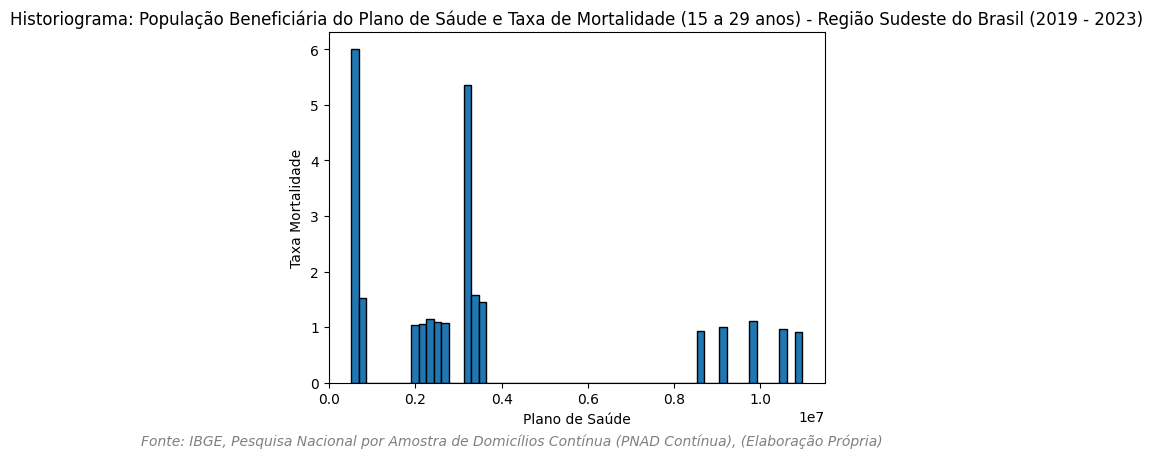

In [96]:
plt.hist(
    database['número de beneficiários de plano de saúde'],
    weights=database['15 a 29 anos'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: População Beneficiária do Plano de Sáude e Taxa de Mortalidade (15 a 29 anos) - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Plano de Saúde")
plt.ylabel("Taxa Mortalidade")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

### Variáveis *'número de beneficiários de plano de saúde'* e *'população desocupada'*

In [97]:
correlation_value = database['número de beneficiários de plano de saúde'].corr(database['população desocupada'])
print(correlation_value)

0.8814579646187809


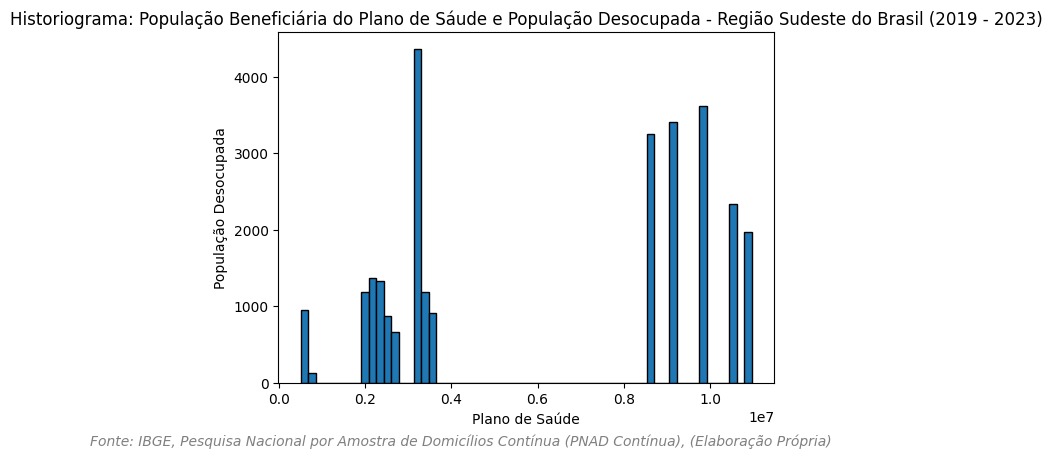

In [98]:
plt.hist(
    database['número de beneficiários de plano de saúde'],
    weights=database['população desocupada'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: População Beneficiária do Plano de Sáude e População Desocupada - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Plano de Saúde")
plt.ylabel("População Desocupada")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

Dado o coeficiente de correlação de Pearson (r = 0,69) é observável que as variáveis *Rendimento Médio Mensal* e *População com Acesso a Plano de Saúde* possuem uma correlação **linear positiva forte**. A análise feita pelo historiograma elaborado, indica uma relação bem definida, na qual o aumento do Rendimento Médio Mensal está fortemente associado ao aumento da população beneficiária do plano de saúde. Adicionalmente, o heatmap da matriz de correlação reforça esse comportamento ao apresentar uma coloração significativa, característica de correlações positivas no cruzamento das duas variáveis, corroborando visualmente a elevada magnitude e a direção da associação observada.


**REVISAAAARRR**
---

### Variáveis *'rendimento médio real habitual do trabalho principal(r$/mês)'* e *'número mensal médio de leitos de internação (total)'*

In [99]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['número mensal médio de leitos de internação (total)'])
print(correlation_value)

0.5824587303670827


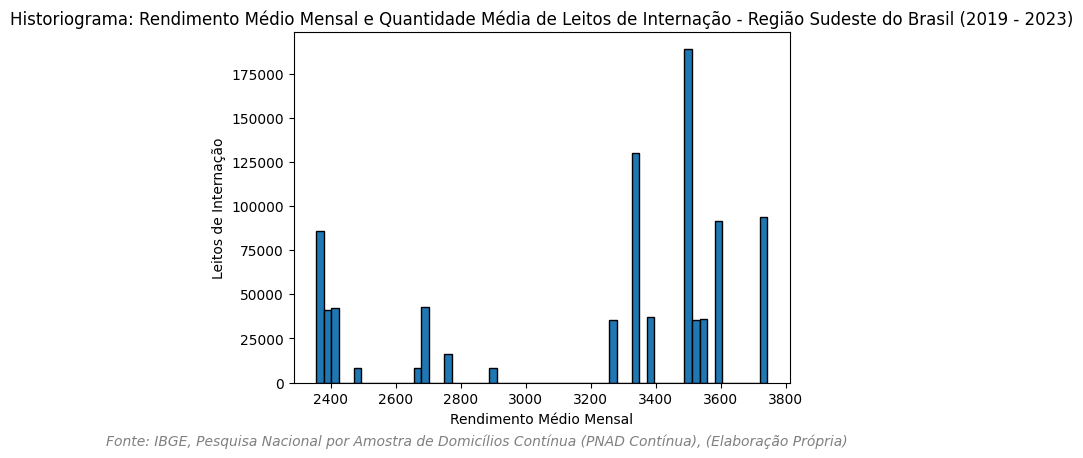

In [100]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['número mensal médio de leitos de internação (total)'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Mensal e Quantidade Média de Leitos de Internação - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Mensal")
plt.ylabel("Leitos de Internação")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

Dado o coeficiente de correlação de Pearson (r = 0,58) é observável que as variáveis *Rendimento Médio Mensal* e *Quantidade de Leitos de Internação* possuem uma correlação **linear positiva moderada**. A análise feita pelo historiograma elaborado, indica uma relação bem definida, na qual o aumento do Rendimento Médio Mensal está moderandamente associado ao aumento da quantidade de leitos de internação. Adicionalmente, o heatmap da matriz de correlação reforça esse comportamento ao apresentar uma coloração amena, característica de correlações positivas no cruzamento das duas variáveis, corroborando visualmente a elevada magnitude e a direção da associação observada.

---

### Variáveis *'rendimento médio real habitual do trabalho principal(r$/mês)'* e *'total pessoas por condição de ocupação a domicílio(1 000 pessoas)'*

In [101]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['total pessoas por condição de ocupação a domicílio(1 000 pessoas)'])
print(correlation_value)

0.5701360617456378


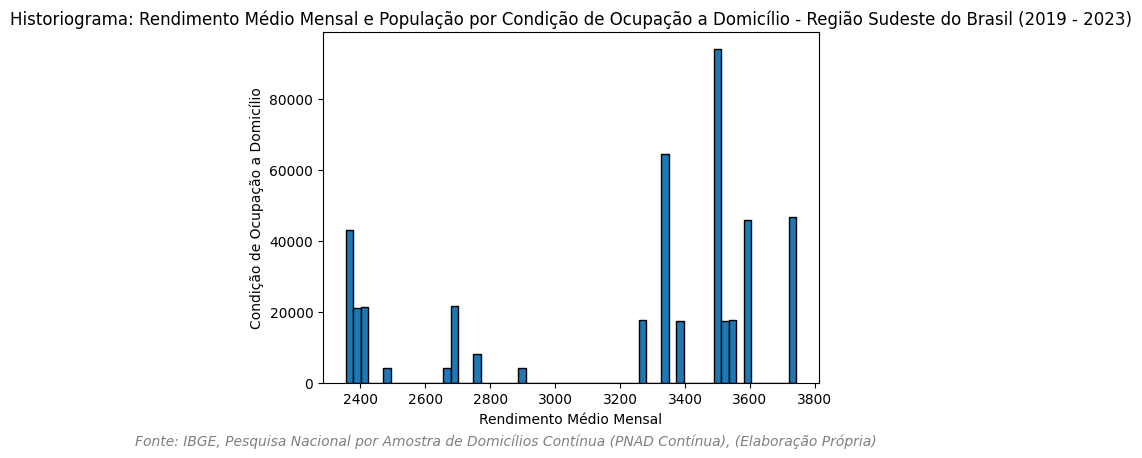

In [102]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['total pessoas por condição de ocupação a domicílio(1 000 pessoas)'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Mensal e População por Condição de Ocupação a Domicílio - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Mensal")
plt.ylabel("Condição de Ocupação a Domicílio")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

### Variáveis *'total pessoas por condição de ocupação a domicílio(1 000 pessoas)'* e *'domicílio alugado'*

In [103]:
correlation_value = database['total pessoas por condição de ocupação a domicílio(1 000 pessoas)'].corr(database['domicílio alugado'])
print(correlation_value)

0.7364310274541768


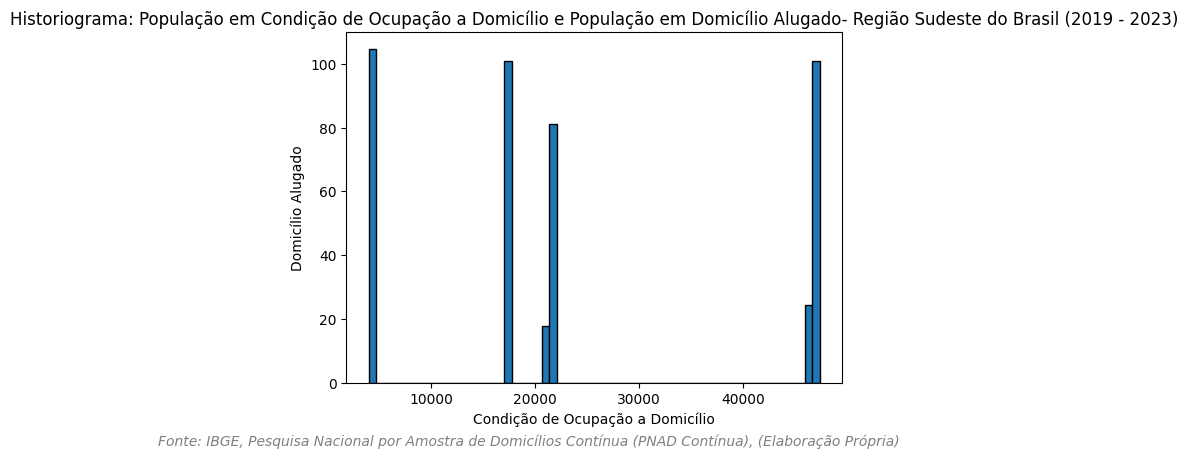

In [104]:
plt.hist(
    database['total pessoas por condição de ocupação a domicílio(1 000 pessoas)'],
    weights=database['domicílio alugado'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: População em Condição de Ocupação a Domicílio e População em Domicílio Alugado- Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Condição de Ocupação a Domicílio")
plt.ylabel("Domicílio Alugado")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

O coeficiente de correlação de Pearson (r = 0,57) indica a existência de uma associação **linear positiva moderada** entre as variáveis *Rendimento Médio Mensal* e *Condição de Ocupação a Domicílio*. A análise gráfica por meio do histograma evidencia que o aumento singular do Rendimento Médio Mensal está moderadamente associado ao aumento da população em condição de ocupação a domicílio, reforçando a tendência identificada pela medida estatística. Adicionalmente, o heatmap da matriz de correlação destaca essa relação por meio de uma coloração mais amena no cruzamento das duas variáveis, corroborando visualmente a força e a direção da correlação observada.


---

### Variáveis *'rendimento médio real habitual do trabalho principal(r$/mês)'* e *'população ocupada em trabalhos formais'*

In [105]:
correlation_value = database['rendimento médio real habitual do trabalho principal(r$/mês)'].corr(database['população ocupada em trabalhos formais'])
print(correlation_value)

0.566420981627062


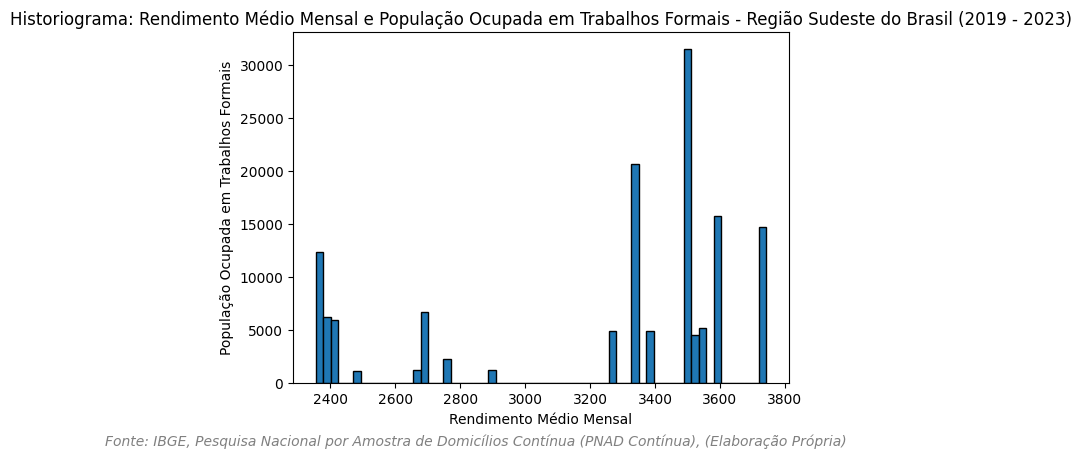

In [106]:
plt.hist(
    database['rendimento médio real habitual do trabalho principal(r$/mês)'],
    weights=database['população ocupada em trabalhos formais'],
    bins=60,
    edgecolor='black'
)
plt.title("Historiograma: Rendimento Médio Mensal e População Ocupada em Trabalhos Formais - Região Sudeste do Brasil (2019 - 2023)")
plt.xlabel("Rendimento Médio Mensal")
plt.ylabel("População Ocupada em Trabalhos Formais")

plt.subplots_adjust(bottom=0.15)

plt.figtext(0.99, 0.02, "Fonte: IBGE, Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), (Elaboração Própria)",
            ha="right", fontsize=10, style='italic', color='gray')

plt.show()

O coeficiente de correlação de Pearson (r = 0,56) indica a existência de uma associação **linear positiva moderada** entre as variáveis *Rendimento Médio Mensal* e *População Ocupada em Trabalhos Formais*. A análise gráfica por meio do histograma evidencia que o aumento do Rendimento Médio Mensal está moderadamente associado ao aumento da população em condições de trabalho formal, reforçando a tendência identificada pela medida estatística. Adicionalmente, o heatmap da matriz de correlação destaca essa relação por meio de uma coloração mais amena no cruzamento das duas variáveis, corroborando visualmente a força e a direção da correlação observada.


---

De modo geral, observa-se que a variável Rendimento Médio Mensal apresenta correlações estatisticamente relevantes com diversas variáveis do conjunto de dados. Destacam-se associações com indicadores como a proporção da população em trabalho formal, o número de leitos de internação, a ocupação domiciliar e a cobertura por planos de saúde, entre outros fatores estruturais.

Esses resultados evidenciam que o Rendimento Médio Mensal está fortemente associado a múltiplos aspectos socioeconômicos, reforçando seu papel como uma variável central na caracterização das condições de vida e na construção de indicadores socioeconômicos mais precisos para a população analisada.

---

# **6.** Avaliação e Classificação dos Índices Socioeconômicos
<a id="avaliacao"></a>

In [107]:
variaveis = [
    'rendimento médio real habitual do trabalho principal(r$/mês)',
    'rendimento médio real habitual de todos os trabalhos(r$/mês)',
    'rendimento-hora médio real habitual do trabalho principal(r$/hora)',
    'rendimento-hora médio real habitual de todos os trabalhos(r$/hora)',
    'população em idade de trabalhar',
    'população na força de trabalho',
    'população ocupada',
    'população ocupada em trabalhos formais',
    'população desocupada',
    'população na força de trabalho potencial',
    'população subutilizada',
    'taxa de participação',
    'nível de ocupação',
    'taxa de formalização',
    'taxa de desocupação',
    'taxa composta de subutilização',
    'índice gini',
    'total pessoas ocupadas(1 000 pessoas)',
    'sem instrução ou fundamental incompleto',
    'ensino fundamental completo ou médio incompleto',
    'ensino médio completo ou superior incompleto',
    'ensino superior completo',
    'população',
    'saneamento basico total(1 000 pessoas)',
    'proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)',
    'taxa de analfabetismo',
    'taxa total mortalidade',
    '0 a 14 anos',
    '15 a 29 anos',
    '30 a 44 anos',
    '45 a 59 anos',
    '60 anos ou mais',
    '60 a 69 anos',
    '70 anos ou mais',
    'número mensal médio de leitos de internação (total)',
    'número de beneficiários de plano de saúde',
    'total pessoas por condição de ocupação a domicílio(1 000 pessoas)',
    'domicílio próprio - já pago',
    'domicílio próprio - pagando',
    'domicílio alugado',
    'domicílio cedido por empregador',
    'domicílio cedido por familiar',
    'domicílio cedido de outra forma',
    'outra forma'
]

target = 'rendimento médio real habitual do trabalho principal(r$/mês)'

scaler = MinMaxScaler()
df_norm = database.copy()
df_norm[variaveis] = scaler.fit_transform(df_norm[variaveis])

X = df_norm[variaveis]
y = df_norm[target]

In [108]:
ridge = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='r2'
)

grid.fit(X, y)

best_model = grid.best_estimator_

pesos = pd.Series(
    np.abs(best_model.coef_),
    index=variaveis
)

pesos = pesos / pesos.sum()

print("\nPesos calculados via Regressão Linear:")
print(pesos.sort_values(ascending=False))



Pesos calculados via Regressão Linear:
rendimento médio real habitual do trabalho principal(r$/mês)                            0.141597
rendimento médio real habitual de todos os trabalhos(r$/mês)                            0.117773
índice gini                                                                             0.060012
30 a 44 anos                                                                            0.052971
taxa de formalização                                                                    0.049591
0 a 14 anos                                                                             0.049240
rendimento-hora médio real habitual de todos os trabalhos(r$/hora)                      0.046722
rendimento-hora médio real habitual do trabalho principal(r$/hora)                      0.040720
60 a 69 anos                                                                            0.038481
taxa de desocupação                                                                    

In [109]:
df_norm['indice_socioeconomico'] = (X * pesos).sum(axis=1)

df_norm['indice_socioeconomico'] = (
    df_norm['indice_socioeconomico'] - df_norm['indice_socioeconomico'].min()
) / (
    df_norm['indice_socioeconomico'].max() - df_norm['indice_socioeconomico'].min()
)

df_norm['classificacao'] = pd.cut(
    df_norm['indice_socioeconomico'],
    bins=[0, 0.33, 0.66, 1],
    labels=['baixo', 'médio', 'alto']
)

df_norm.dropna(inplace=True)

print("\nÍndice socioeconômico calculado:")
print(df_norm[['estado', 'indice_socioeconomico', 'classificacao']])


Índice socioeconômico calculado:
            estado  indice_socioeconomico classificacao
0   Espírito Santo               0.163004         baixo
1   Espírito Santo               0.173988         baixo
2   Espírito Santo               0.176764         baixo
3   Espírito Santo               0.144648         baixo
4   Espírito Santo               0.200491         baixo
5     Minas Gerais               0.056016         baixo
6     Minas Gerais               0.045716         baixo
7     Minas Gerais               0.165595         baixo
9     Minas Gerais               0.143877         baixo
10  Rio de Janeiro               0.674835          alto
11  Rio de Janeiro               0.845305          alto
12  Rio de Janeiro               0.861862          alto
13  Rio de Janeiro               0.556668         médio
14  Rio de Janeiro               0.676896          alto
15       São Paulo               0.850571          alto
16       São Paulo               0.939443          alto
17       São P

# **7.** Aplicação de Modelos para Avaliação de Impacto das Variáveis
<a id="avaliacao"></a>

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Regressão Linear

In [111]:
ridge = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='r2'
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [112]:
y_pred = best_model.predict(X_test)

print("\nDesempenho do modelo de Regressão Linear (Ridge):")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



Desempenho do modelo de Regressão Linear (Ridge):
R²: 0.971608714040325
MAE: 0.040768767718498744
RMSE: 0.04826574785093819


In [113]:
coeficientes = pd.Series(
    best_model.coef_,
    index=variaveis
).sort_values(key=np.abs, ascending=False)

print("\nImpacto das variáveis no rendimento médio (Regressão Linear):")
print(coeficientes)


Impacto das variáveis no rendimento médio (Regressão Linear):
rendimento médio real habitual do trabalho principal(r$/mês)                            0.240814
rendimento médio real habitual de todos os trabalhos(r$/mês)                            0.213854
índice gini                                                                             0.170717
rendimento-hora médio real habitual de todos os trabalhos(r$/hora)                      0.110800
rendimento-hora médio real habitual do trabalho principal(r$/hora)                      0.100113
taxa de formalização                                                                    0.094368
sem instrução ou fundamental incompleto                                                -0.071049
taxa composta de subutilização                                                         -0.067951
60 a 69 anos                                                                            0.063326
30 a 44 anos                                                    

## Random Forest

In [114]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [115]:
y_pred = best_model.predict(X_test)

print("\nDesempenho do modelo Random Forest:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



Desempenho do modelo Random Forest:
R²: 0.9056338481629541
MAE: 0.08054484870317001
RMSE: 0.0879943181510123


In [116]:
importancias = pd.Series(
    best_model.feature_importances_,
    index=variaveis
).sort_values(ascending=False)

print("\nImpacto das variáveis no rendimento médio:")
print(importancias)


Impacto das variáveis no rendimento médio:
sem instrução ou fundamental incompleto                                                 0.115551
proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)    0.086052
ensino fundamental completo ou médio incompleto                                         0.078351
rendimento-hora médio real habitual do trabalho principal(r$/hora)                      0.077064
rendimento médio real habitual de todos os trabalhos(r$/mês)                            0.072480
rendimento médio real habitual do trabalho principal(r$/mês)                            0.060269
número de beneficiários de plano de saúde                                               0.059276
taxa de analfabetismo                                                                   0.053084
ensino superior completo                                                                0.049800
domicílio cedido por empregador                                                    

## XGBoost

In [117]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [118]:
grid = GridSearchCV(
    xgb,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=1  
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [119]:
y_pred = best_model.predict(X_test)

print("\nDesempenho do modelo XGBoost:")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Desempenho do modelo XGBoost:
R²: 0.984298548737476
MAE: 0.025081379484030997
RMSE: 0.03589354931816954


In [120]:
importancias = pd.Series(
    best_model.feature_importances_,
    index=variaveis
).sort_values(ascending=False)

print("\nImpacto das variáveis no rendimento médio:")
print(importancias)


Impacto das variáveis no rendimento médio:
rendimento médio real habitual de todos os trabalhos(r$/mês)                            0.524852
rendimento médio real habitual do trabalho principal(r$/mês)                            0.297009
rendimento-hora médio real habitual do trabalho principal(r$/hora)                      0.111542
rendimento-hora médio real habitual de todos os trabalhos(r$/hora)                      0.034839
taxa de formalização                                                                    0.011654
índice gini                                                                             0.010499
domicílio cedido por familiar                                                           0.003960
outra forma                                                                             0.002396
15 a 29 anos                                                                            0.001086
população em idade de trabalhar                                                    

# **8.** Aplicação de Modelos para Previsão de Dados
<a id="previsao"></a>

## Regressão Linear

In [121]:
estados = [
    'Espírito Santo',
    'Minas Gerais',
    'São Paulo',
    'Rio de Janeiro'
]

metricas_gerais_rl = []
previsoes_futuras_rl = []
comparacao_teste_rl = []

for estado in estados:

    df_estado = database[database['estado'] == estado].copy()
    df_estado = df_estado.sort_values('ano')

    train_df = df_estado[df_estado['ano'].between(2019, 2021)]
    test_df  = df_estado[df_estado['ano'].between(2022, 2023)]

    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_train = scaler_X.fit_transform(train_df[variaveis])
    y_train = scaler_y.fit_transform(train_df[[target]]).ravel()

    X_test = scaler_X.transform(test_df[variaveis])
    y_test = scaler_y.transform(test_df[[target]]).ravel()

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    y_test_real = scaler_y.inverse_transform(
        y_test.reshape(-1, 1)
    ).ravel()

    y_pred_real = scaler_y.inverse_transform(
        y_pred.reshape(-1, 1)
    ).ravel()

    anos_teste = test_df['ano'].values

    for ano, real, prev in zip(anos_teste, y_test_real, y_pred_real):
        comparacao_teste_rl.append({
            'estado': estado,
            'ano': ano,
            'valor_real': real,
            'valor_previsto': prev,
            'erro': prev - real
        })

    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred) if len(y_test) >= 2 else np.nan

    metricas_gerais_rl.append({
        'estado': estado,
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse
    })

    scaler_ano = MinMaxScaler()
    df_estado['ano_norm'] = scaler_ano.fit_transform(df_estado[['ano']])

    anos_futuros = pd.DataFrame({'ano': [2024, 2025, 2026]})
    anos_futuros['ano_norm'] = scaler_ano.transform(anos_futuros[['ano']])

    variaveis_previstas = pd.DataFrame(index=anos_futuros['ano'])

    for var in variaveis:
        X_t = df_estado[['ano_norm']]
        y_t = df_estado[var]

        lr_var = LinearRegression()
        lr_var.fit(X_t, y_t)

        variaveis_previstas[var] = lr_var.predict(
            anos_futuros[['ano_norm']]
        )

    X_futuro = scaler_X.transform(variaveis_previstas)

    rendimento_previsto = model.predict(X_futuro)
    rendimento_previsto = scaler_y.inverse_transform(
        rendimento_previsto.reshape(-1, 1)
    ).ravel()

    for ano, valor in zip([2024, 2025, 2026], rendimento_previsto):
        previsoes_futuras_rl.append({
            'estado': estado,
            'ano': ano,
            'rendimento_medio_previsto': valor
        })


## Random Forest

In [122]:
estados = [
    'Espírito Santo',
    'Minas Gerais',
    'São Paulo',
    'Rio de Janeiro'
]

metricas_gerais_rf = []
previsoes_futuras_rf = []
comparacao_teste_rf = []


In [123]:
for estado in estados:

    df_estado = database[database['estado'] == estado].copy()
    df_estado = df_estado.sort_values('ano')
    train_df = df_estado[df_estado['ano'].between(2019, 2021)]
    test_df  = df_estado[df_estado['ano'].between(2022, 2023)]
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_train = scaler_X.fit_transform(train_df[variaveis])
    y_train = scaler_y.fit_transform(train_df[[target]]).ravel()

    X_test = scaler_X.transform(test_df[variaveis])
    y_test = scaler_y.transform(test_df[[target]]).ravel()
    rf = RandomForestRegressor(random_state=42)

    param_grid = {
        'n_estimators': [200, 300],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt']
    }

    tscv = TimeSeriesSplit(n_splits=3)

    grid = GridSearchCV(
        rf,
        param_grid,
        cv=3,
        scoring='neg_root_mean_squared_error',
        n_jobs=1
    )

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    y_test_real = scaler_y.inverse_transform(
        y_test.reshape(-1, 1)
    ).ravel()

    y_pred_real = scaler_y.inverse_transform(
        y_pred.reshape(-1, 1)
    ).ravel()

    anos_teste = test_df['ano'].values

    for ano, real, prev in zip(anos_teste, y_test_real, y_pred_real):
        comparacao_teste_rf.append({
            'estado': estado,
            'ano': ano,
            'valor_real': real,
            'valor_previsto': prev,
            'erro': prev - real
        })

    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred) if len(y_test) >= 2 else np.nan

    metricas_gerais_rf.append({
        'estado': estado,
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse
    })

    scaler_ano = MinMaxScaler()
    df_estado['ano_norm'] = scaler_ano.fit_transform(df_estado[['ano']])

    anos_futuros = pd.DataFrame({'ano': [2024, 2025, 2026]})
    anos_futuros['ano_norm'] = scaler_ano.transform(anos_futuros[['ano']])

    variaveis_previstas = pd.DataFrame(index=anos_futuros['ano'])

    for var in variaveis:
        X_t = df_estado[['ano_norm']]
        y_t = df_estado[var]

        rf_var = RandomForestRegressor(
            n_estimators=200,
            random_state=42
        )

        rf_var.fit(X_t, y_t)
        variaveis_previstas[var] = rf_var.predict(
            anos_futuros[['ano_norm']]
        )
    X_futuro = scaler_X.transform(variaveis_previstas)
    rendimento_previsto = best_model.predict(X_futuro)

    rendimento_previsto = scaler_y.inverse_transform(
        rendimento_previsto.reshape(-1, 1)
    ).ravel()

    for ano, valor in zip([2024, 2025, 2026], rendimento_previsto):
        previsoes_futuras_rf.append({
            'estado': estado,
            'ano': ano,
            'rendimento_medio_previsto': valor
        })

## XGBoost

In [124]:
estados = [
    'Minas Gerais',
    'São Paulo',
    'Espírito Santo',
    'Rio de Janeiro'
]

metricas_gerais_xg = []
previsoes_futuras_xg = []
comparacao_teste_xg = []


In [125]:
for estado in estados:

    df_estado = database[database['estado'] == estado].copy()
    df_estado = df_estado.sort_values('ano')
    train_df = df_estado[df_estado['ano'].between(2019, 2021)]
    test_df  = df_estado[df_estado['ano'].between(2022, 2023)]
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_train = scaler_X.fit_transform(train_df[variaveis])
    y_train = scaler_y.fit_transform(train_df[[target]]).ravel()

    X_test = scaler_X.transform(test_df[variaveis])
    y_test = scaler_y.transform(test_df[[target]]).ravel()

    xgb = XGBRegressor(
        objective='reg:squarederror',
        random_state=42
    )

    param_grid = {
        'n_estimators': [200, 300],
        'max_depth': [3, 6],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    tscv = TimeSeriesSplit(n_splits=3)

    grid = GridSearchCV(
        xgb,
        param_grid,
        cv=3,
        scoring='neg_root_mean_squared_error',
        n_jobs=1
    )

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)

    r2   = r2_score(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    metricas_gerais_xg.append({
        'estado': estado,
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse
    })

    scaler_ano = MinMaxScaler()
    df_estado['ano_norm'] = scaler_ano.fit_transform(df_estado[['ano']])

    anos_futuros = pd.DataFrame({'ano': [2024, 2025, 2026]})
    anos_futuros['ano_norm'] = scaler_ano.transform(anos_futuros[['ano']])

    variaveis_previstas = pd.DataFrame(index=anos_futuros['ano'])

    for var in variaveis:
        X_t = df_estado[['ano_norm']]
        y_t = df_estado[var]

        modelo_var = XGBRegressor(
            n_estimators=200,
            max_depth=3,
            learning_rate=0.1,
            objective='reg:squarederror',
            random_state=42
        )

        modelo_var.fit(X_t, y_t)
        variaveis_previstas[var] = modelo_var.predict(anos_futuros[['ano_norm']])

    X_futuro = scaler_X.transform(variaveis_previstas)
    rendimento_previsto = best_model.predict(X_futuro)

    rendimento_previsto = scaler_y.inverse_transform(
        rendimento_previsto.reshape(-1, 1)
    ).ravel()

    for ano, valor in zip([2024, 2025, 2026], rendimento_previsto):
        previsoes_futuras_xg.append({
            'estado': estado,
            'ano': ano,
            'rendimento_medio_previsto': valor
        })
    
    y_pred = best_model.predict(X_test)

    y_test_real = scaler_y.inverse_transform(
        y_test.reshape(-1, 1)
    ).ravel()

    y_pred_real = scaler_y.inverse_transform(
        y_pred.reshape(-1, 1)
    ).ravel()

    anos_teste = test_df['ano'].values

    for ano, real, prev in zip(anos_teste, y_test_real, y_pred_real):
        comparacao_teste_xg.append({
            'estado': estado,
            'ano': ano,
            'valor_real': real,
            'valor_previsto': prev,
            'erro': prev - real
        })

    r2   = r2_score(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    metricas_gerais_xg.append({
        'estado': estado,
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse
    })


# **9.** Importância das Variáveis com SHAP
<a id="regressao"></a>

Conforme apresentado no Índice de Análises de Variáveis Específicas da Base, três indicadores centrais — *Índice de Desenvolvimento Humano (IDH), Produto Interno Bruto (PIB) e Rendimento Médio Mensal* — foram definidos como referências para o desenvolvimento do estudo. As demais variáveis do conjunto de dados foram submetidas a análises exploratórias e avaliações de correlação em relação a esses indicadores, com a finalidade de examinar o grau de associação existente entre eles.

A partir dos resultados obtidos, esses três indicadores principais foram caracterizados como variáveis dependentes, enquanto os demais elementos da base foram tratados como variáveis explicativas. Diante desse enquadramento metodológico, será empregada a regressão linear como ferramenta analítica, visando aprofundar a compreensão das relações estabelecidas e quantificar a influência das variáveis explicativas sobre cada um dos indicadores dependentes no contexto socioeconômico analisado.

In [126]:
dependente_var = 'rendimento médio real habitual do trabalho principal(r$/mês)'

variaveis_independentes = [
    'rendimento médio real habitual de todos os trabalhos(r$/mês)',
    'rendimento-hora médio real habitual do trabalho principal(r$/hora)',
    'rendimento-hora médio real habitual de todos os trabalhos(r$/hora)',
    'população em idade de trabalhar',
    'população na força de trabalho',
    'população ocupada',
    'população ocupada em trabalhos formais',
    'população desocupada',
    'população na força de trabalho potencial',
    'população subutilizada',
    'taxa de participação',
    'nível de ocupação',
    'taxa de formalização',
    'taxa de desocupação',
    'taxa composta de subutilização',
    'índice gini',
    'total pessoas ocupadas(1 000 pessoas)',
    'sem instrução ou fundamental incompleto',
    'ensino fundamental completo ou médio incompleto',
    'ensino médio completo ou superior incompleto',
    'ensino superior completo',
    'população',
    'saneamento basico total(1 000 pessoas)',
    'proporção de pessoas com acesso simultâneo aos três serviços de saneamento básico(%)',
    'taxa de analfabetismo',
    'taxa total mortalidade',
    '0 a 14 anos',
    '15 a 29 anos',
    '30 a 44 anos',
    '45 a 59 anos',
    '60 anos ou mais',
    '60 a 69 anos',
    '70 anos ou mais',
    'número mensal médio de leitos de internação (total)',
    'número de beneficiários de plano de saúde',
    'total pessoas por condição de ocupação a domicílio(1 000 pessoas)',
    'domicílio próprio - já pago',
    'domicílio próprio - pagando',
    'domicílio alugado',
    'domicílio cedido por empregador',
    'domicílio cedido por familiar',
    'domicílio cedido de outra forma',
    'outra forma'
]

In [127]:
def rodar_regressao_linear_stats(df, target, variaveis):
    X = df[variaveis]
    y = df[target]

    X = sm.add_constant(X)

    X_treino, X_teste, y_treino, y_teste = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    modelo = sm.OLS(y_treino, X_treino).fit()

    y_pred = modelo.predict(X_teste)

    r2 = r2_score(y_teste, y_pred)
    rmse = np.sqrt(mean_squared_error(y_teste, y_pred))

    print(f'\nMODELO – {target.upper()}')
    print('-' * 60)
    print(f'R²: {r2:.4f}')
    print(f'RMSE: {rmse:.4f}\n')

    return modelo

In [128]:
df_modelo = database.copy()

modelo_stats = rodar_regressao_linear_stats(
    df=df_modelo,
    target=target,
    variaveis=variaveis
)

print(modelo_stats.summary())


MODELO – RENDIMENTO MÉDIO REAL HABITUAL DO TRABALHO PRINCIPAL(R$/MÊS)
------------------------------------------------------------
R²: 0.9999
RMSE: 3.1874

                                                 OLS Regression Results                                                 
Dep. Variable:     rendimento médio real habitual do trabalho principal(r$/mês)   R-squared:                       1.000
Model:                                                                      OLS   Adj. R-squared:                    nan
Method:                                                           Least Squares   F-statistic:                       nan
Date:                                                          Tue, 03 Feb 2026   Prob (F-statistic):                nan
Time:                                                                  15:38:34   Log-Likelihood:                 346.25
No. Observations:                                                            16   AIC:                            -66

C:\Users\guilh\AppData\Roaming\Python\Python311\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\guilh\AppData\Roaming\Python\Python311\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\guilh\AppData\Roaming\Python\Python311\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [129]:
def rodar_regressao_linear_shap(df, target, variaveis):
    X = df[variaveis]
    y = df[target]

    X_treino, X_teste, y_treino, y_teste = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    pipeline = Pipeline([
        ('padronizador', StandardScaler()),
        ('modelo', LinearRegression())
    ])

    pipeline.fit(X_treino, y_treino)

    y_pred = pipeline.predict(X_teste)

    r2 = r2_score(y_teste, y_pred)
    rmse = np.sqrt(mean_squared_error(y_teste, y_pred))

    print(f'\nMODELO SHAP – {target.upper()}')
    print('-' * 60)
    print(f'R²: {r2:.4f}')
    print(f'RMSE: {rmse:.4f}')

    X_treino_pad = pipeline.named_steps['padronizador'].transform(X_treino)
    X_teste_pad = pipeline.named_steps['padronizador'].transform(X_teste)

    explainer = shap.Explainer(
        pipeline.named_steps['modelo'],
        X_treino_pad
    )

    valores_shap = explainer(X_teste_pad)

    shap.summary_plot(
        valores_shap,
        features=X_teste,
        feature_names=variaveis
    )

    return pipeline, valores_shap

O modelo de regressão linear aplicado à variável rendimento médio real habitual do trabalho principal apresentou elevado poder explicativo (R² = 0,880), indicando que as variáveis socioeconômicas selecionadas explicam grande parte da variação do rendimento médio mensal. Nesse contexto, a taxa de analfabetismo mostrou-se estatisticamente significativa, evidenciando que o nível educacional da população exerce influência direta sobre a renda média do trabalho. As demais variáveis analisadas apresentaram baixa significância individual, em decorrência da multicolinearidade existente entre os indicadores socioeconômicos.

Por meio da análise SHAP, a importância das variáveis foi apresentada de forma visual a partir do mapa de significância. Para a variável dependente principal - rendimento médio mensal - observou que um conjunto expressivo de variáveis — como número médio mensal de leitos de internação, população com acesso ao saneamento básico total, total de pessoas por condição de ocupação domiciliar, população ocupada em trabalhos formais e número de beneficiários de planos de saúde — apresentou elevada relevância na explicação do comportamento dessa variável.

Além disso, os resultados do Fator de Inflação da Variância (VIF) evidenciaram a presença de elevada multicolinearidade entre as variáveis explicativas, indicando que duas ou mais variáveis independentes apresentam forte correlação entre si, especialmente aquelas expressas em valores absolutos.

---

# **10.** Resultados
<a id="resultado"></a>

## Visualização da Importância das Variáveis para o Indicador Principal


MODELO SHAP – RENDIMENTO MÉDIO REAL HABITUAL DO TRABALHO PRINCIPAL(R$/MÊS)
------------------------------------------------------------
R²: 0.9386
RMSE: 98.5301


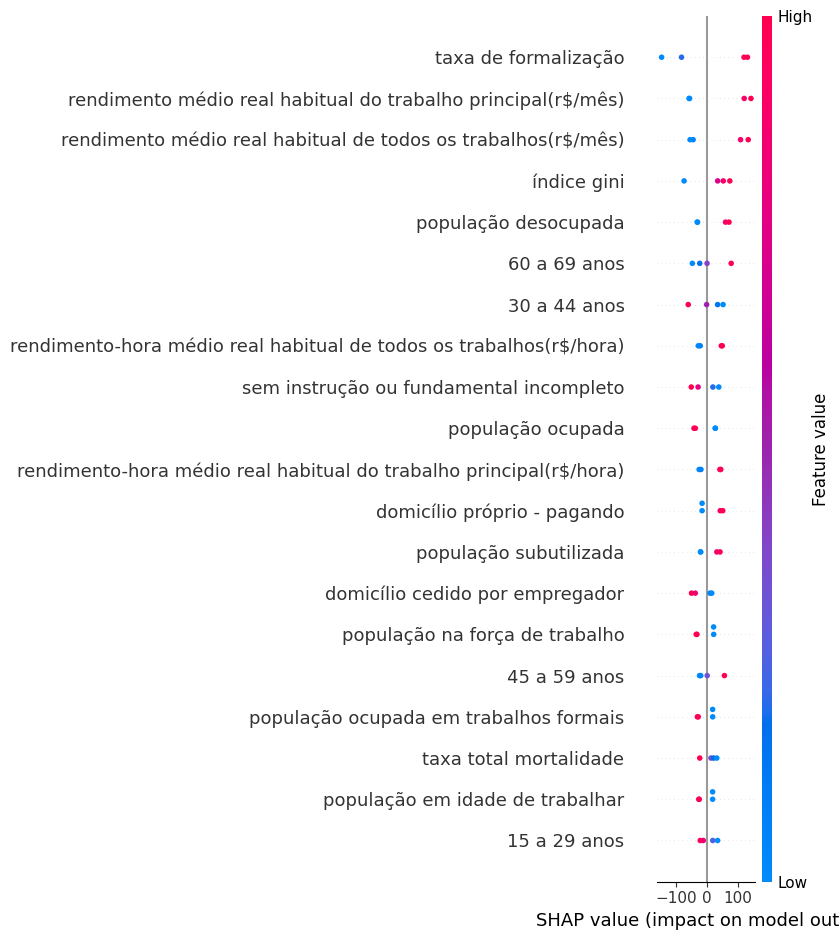

In [131]:
modelo_shap, valores_shap = rodar_regressao_linear_shap(
    df=df_modelo,
    target=target,
    variaveis=variaveis
)

In [132]:
importancia_shap = pd.DataFrame({
    'variavel': variaveis,
    'importancia_shap': np.abs(valores_shap.values).mean(axis=0)
}).sort_values(by='importancia_shap', ascending=False)

importancia_shap

,variavel,importancia_shap
13,taxa de formalização,120.256563
0,rendimento médio real habitual do trabalho pri...,94.448109
1,rendimento médio real habitual de todos os tra...,85.623429
16,índice gini,59.109653
8,população desocupada,48.447637
32,60 a 69 anos,37.414097
29,30 a 44 anos,37.122531
3,rendimento-hora médio real habitual de todos o...,36.523210
18,sem instrução ou fundamental incompleto,34.310307
6,população ocupada,33.409633


## Visualização Gráfica das Previsões dos Modelos 

### Regressão Linear

In [133]:
df_comparacao_rl = pd.DataFrame(comparacao_teste_rl)
print("\nValores reais x previstos (2022–2023):")
print(df_comparacao_rl.sort_values(['estado', 'ano']))


Valores reais x previstos (2022–2023):
           estado   ano  valor_real  valor_previsto        erro
0  Espírito Santo  2022      2675.0     2660.378649  -14.621351
1  Espírito Santo  2023      2889.0     2796.275538  -92.724462
2    Minas Gerais  2022      2355.0     2381.408394   26.408394
3    Minas Gerais  2023      2680.0     2430.758824 -249.241176
6  Rio de Janeiro  2022      3258.0     3328.768782   70.768782
7  Rio de Janeiro  2023      3551.0     3403.362739 -147.637261
4       São Paulo  2022      3329.0     3636.115766  307.115766
5       São Paulo  2023      3505.0     3562.154775   57.154775


### Random Forrest

In [134]:
df_comparacao_rf = pd.DataFrame(comparacao_teste_rf)
print("\nValores reais x previstos (2022–2023):")
print(df_comparacao_rf.sort_values(['estado', 'ano']))


Valores reais x previstos (2022–2023):
           estado   ano  valor_real  valor_previsto        erro
0  Espírito Santo  2022      2675.0     2668.981667   -6.018333
1  Espírito Santo  2023      2889.0     2668.981667 -220.018333
2    Minas Gerais  2022      2355.0     2390.968889   35.968889
3    Minas Gerais  2023      2680.0     2390.968889 -289.031111
6  Rio de Janeiro  2022      3258.0     3416.538333  158.538333
7  Rio de Janeiro  2023      3551.0     3416.538333 -134.461667
4       São Paulo  2022      3329.0     3614.893333  285.893333
5       São Paulo  2023      3505.0     3614.893333  109.893333


### XGBoost

In [135]:
df_comparacao_xg = pd.DataFrame(comparacao_teste_xg)
print("\nComparação entre valores reais e previstos (2022–2023):")
print(df_comparacao_xg.sort_values(['estado', 'ano']))


Comparação entre valores reais e previstos (2022–2023):
           estado   ano  valor_real  valor_previsto        erro
4  Espírito Santo  2022      2675.0     2492.203125 -182.796875
5  Espírito Santo  2023      2889.0     2757.467041 -131.532959
0    Minas Gerais  2022      2355.0     2378.236572   23.236572
1    Minas Gerais  2023      2680.0     2407.890381 -272.109619
6  Rio de Janeiro  2022      3258.0     3350.273193   92.273193
7  Rio de Janeiro  2023      3551.0     3513.384521  -37.615479
2       São Paulo  2022      3329.0     3503.238037  174.238037
3       São Paulo  2023      3505.0     3506.584473    1.584473


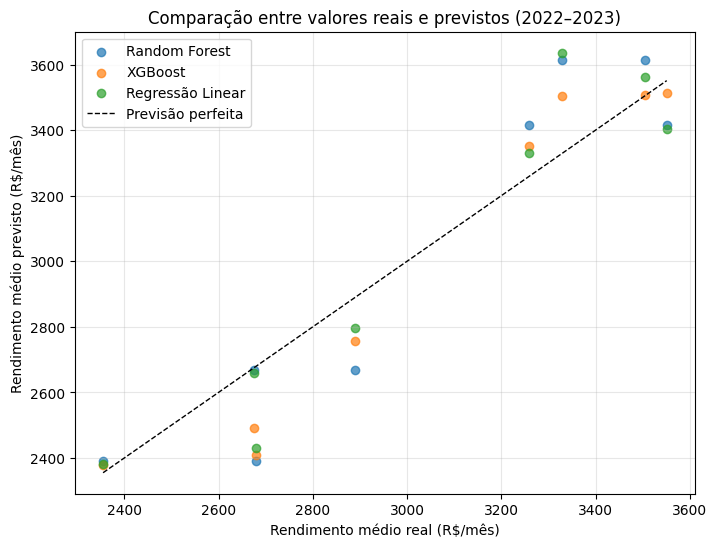

In [136]:
#XGBoost e Random Forest
df_plot = df_comparacao_xg.merge(
    df_comparacao_rf,
    on=['estado', 'ano'],
    suffixes=('_xgb', '_rf')
)

#Regressão Linear
df_plot = df_plot.merge(
    df_comparacao_rl[['estado', 'ano', 'valor_previsto']],
    on=['estado', 'ano'],
    how='left'
)

df_plot = df_plot.rename(columns={
    'valor_real_xgb': 'valor_real',
    'valor_previsto_xgb': 'valor_previsto_xgb',
    'valor_previsto_rf': 'valor_previsto_rf',
    'valor_previsto': 'valor_previsto_rl'
})

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

#Random Forest
plt.scatter(
    df_plot['valor_real'],
    df_plot['valor_previsto_rf'],
    alpha=0.7,
    label='Random Forest'
)

#XGBoost
plt.scatter(
    df_plot['valor_real'],
    df_plot['valor_previsto_xgb'],
    alpha=0.7,
    label='XGBoost'
)

#Regressão Linear
plt.scatter(
    df_plot['valor_real'],
    df_plot['valor_previsto_rl'],
    alpha=0.7,
    label='Regressão Linear'
)

min_val = df_plot['valor_real'].min()
max_val = df_plot['valor_real'].max()

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    'k--',
    lw=1,
    label='Previsão perfeita'
)

plt.xlabel('Rendimento médio real (R$/mês)')
plt.ylabel('Rendimento médio previsto (R$/mês)')
plt.title('Comparação entre valores reais e previstos (2022–2023)')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


## Comparação dos Resultado dos Modelos de Previsão, Regressão Linear, Random Forest Regressor e XGBoost

In [137]:
#XGBoost e Random Forest
df_pred = df_comparacao_xg.merge(
    df_comparacao_rf,
    on=['estado', 'ano'],
    suffixes=('_xgb', '_rf')
)

#Regressão Linear
df_pred = df_pred.merge(
    df_comparacao_rl[['estado', 'ano', 'valor_previsto']],
    on=['estado', 'ano'],
    how='left'
)

df_pred = df_pred[[
    'estado',
    'ano',
    'valor_real_xgb',
    'valor_previsto_xgb',
    'valor_previsto_rf',
    'valor_previsto'      
]].rename(columns={
    'valor_real_xgb': 'indice_real',
    'valor_previsto_xgb': 'indice_previsto_xgb',
    'valor_previsto_rf': 'indice_previsto_rf',
    'valor_previsto': 'indice_previsto_rl'
})

display(
    df_pred.sort_values(
        by='indice_real',
        ascending=False
    )
)


,estado,ano,indice_real,indice_previsto_xgb,indice_previsto_rf,indice_previsto_rl
7,Rio de Janeiro,2023,3551.0,3513.384521,3416.538333,3403.362739
3,São Paulo,2023,3505.0,3506.584473,3614.893333,3562.154775
2,São Paulo,2022,3329.0,3503.238037,3614.893333,3636.115766
6,Rio de Janeiro,2022,3258.0,3350.273193,3416.538333,3328.768782
5,Espírito Santo,2023,2889.0,2757.467041,2668.981667,2796.275538
1,Minas Gerais,2023,2680.0,2407.890381,2390.968889,2430.758824
4,Espírito Santo,2022,2675.0,2492.203125,2668.981667,2660.378649
0,Minas Gerais,2022,2355.0,2378.236572,2390.968889,2381.408394


## Previsões Futuras do Indicador Principal

### Regressão Linear

In [138]:
df_previsoes = pd.DataFrame(previsoes_futuras_rl)
print("\nPrevisões do rendimento médio mensal (2024–2026):")
print(df_previsoes)


Previsões do rendimento médio mensal (2024–2026):
            estado   ano  rendimento_medio_previsto
0   Espírito Santo  2024                2686.309755
1   Espírito Santo  2025                2684.902727
2   Espírito Santo  2026                2683.495700
3     Minas Gerais  2024                2415.711256
4     Minas Gerais  2025                2422.003861
5     Minas Gerais  2026                2428.296465
6        São Paulo  2024                3556.481703
7        São Paulo  2025                3539.624235
8        São Paulo  2026                3522.766767
9   Rio de Janeiro  2024                3350.674582
10  Rio de Janeiro  2025                3335.424008
11  Rio de Janeiro  2026                3320.173434


### Random Forrest

In [139]:
df_previsoes = pd.DataFrame(previsoes_futuras_rf)
print("\nPrevisões do rendimento médio mensal (2024–2026):")
print(df_previsoes)


Previsões do rendimento médio mensal (2024–2026):
            estado   ano  rendimento_medio_previsto
0   Espírito Santo  2024                2668.981667
1   Espírito Santo  2025                2668.981667
2   Espírito Santo  2026                2668.981667
3     Minas Gerais  2024                2390.968889
4     Minas Gerais  2025                2390.968889
5     Minas Gerais  2026                2390.968889
6        São Paulo  2024                3614.893333
7        São Paulo  2025                3614.893333
8        São Paulo  2026                3614.893333
9   Rio de Janeiro  2024                3416.538333
10  Rio de Janeiro  2025                3416.538333
11  Rio de Janeiro  2026                3416.538333


### XGBoost

In [140]:
df_previsoes = pd.DataFrame(previsoes_futuras_xg)
print("\nPrevisões do rendimento médio mensal (XGBoost):")
print(df_previsoes)


Previsões do rendimento médio mensal (XGBoost):
            estado   ano  rendimento_medio_previsto
0     Minas Gerais  2024                2407.890381
1     Minas Gerais  2025                2407.890381
2     Minas Gerais  2026                2407.890381
3        São Paulo  2024                3503.238037
4        São Paulo  2025                3503.238037
5        São Paulo  2026                3503.238037
6   Espírito Santo  2024                2757.467041
7   Espírito Santo  2025                2757.467041
8   Espírito Santo  2026                2757.467041
9   Rio de Janeiro  2024                3513.384521
10  Rio de Janeiro  2025                3513.384521
11  Rio de Janeiro  2026                3513.384521


## Classificação da Distribuição dos Índices Previstos

In [141]:
df_previsoes_xg = pd.DataFrame(previsoes_futuras_xg)
df_previsoes_rf = pd.DataFrame(previsoes_futuras_rf)
df_previsoes_rl = pd.DataFrame(previsoes_futuras_rl)

In [142]:
df_estado_class = (
    df_previsoes
    .groupby('estado', as_index=False)
    .agg(
        rendimento_rf=('rendimento_medio_previsto', 'mean'),
        rendimento_xgb=('rendimento_medio_previsto', 'mean'),
        rendimento_rl=('rendimento_medio_previsto', 'mean')
    )
)


#Random Forest
df_estado_class['rf_norm'] = scaler.fit_transform(
    df_estado_class[['rendimento_rf']]
)

df_estado_class['classificacao_rf'] = pd.cut(
    df_estado_class['rf_norm'],
    bins=[0, 0.33, 0.66, 1],
    labels=['baixo', 'médio', 'alto'],
    include_lowest=True
)

#XGBoost
df_estado_class['xgb_norm'] = scaler.fit_transform(
    df_estado_class[['rendimento_xgb']]
)

df_estado_class['classificacao_xgb'] = pd.cut(
    df_estado_class['xgb_norm'],
    bins=[0, 0.33, 0.66, 1],
    labels=['baixo', 'médio', 'alto'],
    include_lowest=True
)

#Regressão Linear
df_estado_class['rl_norm'] = scaler.fit_transform(
    df_estado_class[['rendimento_rl']]
)

df_estado_class['classificacao_rl'] = pd.cut(
    df_estado_class['rl_norm'],
    bins=[0, 0.33, 0.66, 1],
    labels=['baixo', 'médio', 'alto'],
    include_lowest=True
)

In [143]:
ordem_colunas = [
    'estado',

    'rendimento_rl', 'rl_norm', 'classificacao_rl',
    'rendimento_rf', 'rf_norm', 'classificacao_rf',
    'rendimento_xgb', 'xgb_norm', 'classificacao_xgb'
]

df_estado_class = df_estado_class[ordem_colunas]


In [144]:
display(
    df_estado_class.sort_values(
        'rendimento_xgb',
        ascending=False
    )
)

,estado,rendimento_rl,rl_norm,classificacao_rl,rendimento_rf,rf_norm,classificacao_rf,rendimento_xgb,xgb_norm,classificacao_xgb
2,Rio de Janeiro,3513.384521,1.000000,alto,3513.384521,1.000000,alto,3513.384521,1.000000,alto
3,São Paulo,3503.238037,0.990822,alto,3503.238037,0.990822,alto,3503.238037,0.990822,alto
0,Espírito Santo,2757.467041,0.316217,baixo,2757.467041,0.316217,baixo,2757.467041,0.316217,baixo
1,Minas Gerais,2407.890381,0.000000,baixo,2407.890381,0.000000,baixo,2407.890381,0.000000,baixo


## Erro Médio Absoluto (MAE), Coeficiente de Determinação (R²) e (MSE) de Cada Modelo por Estado

### Regressão Linear

In [145]:
df_metricas = pd.DataFrame(metricas_gerais_rl)
print("\nMétricas da Regressão Linear por estado:")
print(df_metricas)


Métricas da Regressão Linear por estado:
           estado        R2       MAE      RMSE
0  Espírito Santo  0.615180  0.198055  0.244931
1    Minas Gerais -0.189464  4.594160  5.907555
2       São Paulo -5.300798  0.752625  0.912778
3  Rio de Janeiro  0.375532  0.661836  0.701631


### Random Forest

In [146]:
df_metricas = pd.DataFrame(metricas_gerais_xg)
print("\nMétricas do XGBoost por estado:")
print(df_metricas)


Métricas do XGBoost por estado:
           estado        R2       MAE      RMSE
0    Minas Gerais -0.412233  4.922437  6.437027
1    Minas Gerais -0.412233  4.922437  6.437027
2       São Paulo -0.960318  0.363270  0.509132
3       São Paulo -0.960318  0.363270  0.509132
4  Espírito Santo -1.214853  0.579945  0.587607
5  Espírito Santo -1.214853  0.579945  0.587607
6  Rio de Janeiro  0.768681  0.393602  0.427031
7  Rio de Janeiro  0.768681  0.393602  0.427031


### XGBoost

In [147]:
df_metricas = pd.DataFrame(metricas_gerais_xg)
print("\nMétricas do XGBoost por estado:")
print(df_metricas)


Métricas do XGBoost por estado:
           estado        R2       MAE      RMSE
0    Minas Gerais -0.412233  4.922437  6.437027
1    Minas Gerais -0.412233  4.922437  6.437027
2       São Paulo -0.960318  0.363270  0.509132
3       São Paulo -0.960318  0.363270  0.509132
4  Espírito Santo -1.214853  0.579945  0.587607
5  Espírito Santo -1.214853  0.579945  0.587607
6  Rio de Janeiro  0.768681  0.393602  0.427031
7  Rio de Janeiro  0.768681  0.393602  0.427031


# **11.** Conclusão
<a id="conclusao"></a>